#ISYE 6740 Group Project

In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
#packages to import
import pandas as pd
import numpy as np
import emoji

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

def autolabel(rects, vertoffset):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, vertoffset),
                    textcoords="offset points",
                    ha='center', va='bottom')

/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [3]:
#Using GDrive link
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
##Pull in the data
#Copy Path below
#global_data = pd.read_csv(" /content/drive/My Drive/Global_Dataset_14Apr2020.csv")
m10k = pd.read_csv("marinus_trafficking_10k_cleansed.csv")
webscrape = pd.read_csv("webscrape_backpage_top10_reduced.csv")

In [5]:
#View the data
#global_data.head()

# Marinus Data Cleaning

In [6]:
m10k.head()

,id,label,title,body
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️⛔️BeAutiful Young⛔️⛔️⛔️⛔️⛔️OUTCALL ONLY - 22,"Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br> I am a sweet KOREAN girl with silky long hair Natrual Sexy body and great service！<br> Treat you like a King and NEVER RUSH! My pics are real and recent <br> I like deep kissing.. 💋💋💋💋<br> I enjoy kissing ur whole body slowly. I know how to treat a gentleman. <br> Age : 22<br> Measurements : 36D-24-34<br> Height : 5'3""<br> Weight : 106 lbs<br> ☎️ NO black guys<br>NO TEXT 🌹🌹🌹🌹🌹🌹🌹🌹"
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack 🎉🎊 READY - 21,• So Treat Yourself to Heaven on Earth...🌍 YOU DESERVE IT!<br> 👉 9.5 HUNG C*T<br> 👉👉1OO% Functional<br> 👉👉1OO% upscale & classy<br> 🍃🙌 420 +++++ Party +<br> •°★°•1OO% discreet & drama free verse 420 friendly
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great Reviews ❤Today's pics inside❤NoRushAppts - 25,Aren't you tired of the old bait and switch or pictures 10yr old or 20lbs ago? Well with me what you see is what you get. Most say I look better in person but I'll let you be the judge. I'm blessed with soft curves legs for days bedroom brown eyes and soft full lips. I am sure to have you weak in the knees and begging for more. I have a pretty diverse menu just call me for details but please be discreet.<br> <br> If it's not me it's free* Fetish&Rear Access Available <br> <br> Kaylani


In [7]:
m10k2 = m10k.copy()
m10k2['body_no_emojis'] = m10k2['body']
m10k2['title_no_emojis'] = m10k2['title']

for entry in range(len(m10k2)):
  try:
    m10k2['body_no_emojis'][entry] = emoji.demojize(m10k2['body'][entry], delimiters=(" ", " "))
    m10k2['title_no_emojis'][entry] = emoji.demojize(m10k2['title'][entry], delimiters=(" ", " "))
  except:
    m10k2['body_no_emojis'][entry] = ''

m10k2['body_no_emojis'] = m10k2['body_no_emojis'].str.lower()
m10k2['title_no_emojis'] = m10k2['title_no_emojis'].str.lower()

/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load 

### Get Age Value

In [8]:
# New version 
m10k2['age_drop'] = 0


for i, j in m10k2.iterrows():
 # print(j['title_no_emojis'][-2::])
  try:
    m10k2['age_drop'][i] = j['title_no_emojis'][-6::]
  except:
    m10k2['age_drop'][i] = [0]

m10k2['age'] = m10k2['age_drop'].str.extract(r'- (\d+)').fillna(0).astype(int)


#for i, j in m10k2.iterrows():
#try:
#m10k2['age'] = m10k2['age_test'].apply(lambda x: np.nan if len(x)==0 else x[0])
  #m10k2['age'][i] = m10k2['age_test'][i][0]
#except:
 # m10k2['age'][i] = np.nan


/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove 

In [9]:
m10k2[m10k2['age'].isna()].head(5)

,id,label,title,body,body_no_emojis,title_no_emojis,age_drop,age


In [10]:
m10k2[['title_no_emojis','age_drop','age']].head(2)

,title_no_emojis,age_drop,age
0,ms chrissy - 22,y - 22,22
1,everybody loves a filipina girl - 29,l - 29,29


In [11]:
m10k2 = m10k2.drop(['age_drop'], axis=1)

In [12]:
#old version 

#m10k2['age'] = float("NaN")

#for i, j in m10k2.iterrows():
 # print(j['title_no_emojis'][-2::])
#  try:
#    m10k2['age'][i] = j['title_no_emojis'][-2::]
#  except:
#    m10k2['age'][i] = float("NaN")

#m10k2['age'].isna().sum()

#display(m10k2)
#m10k2.head(5)

### Get Weight Value

In [13]:
import re

try:
  m10k2['weight1'] = m10k2['body_no_emojis'].str.findall('weight : (\d+)')
  m10k2['weight2'] = m10k2['body_no_emojis'].str.findall(r'(\d+) ?lbs')
  m10k2['weight3'] = m10k2['body_no_emojis'].str.findall(r'(\d+) ?kg')
except:
  m10k2['weight1'] = 0
  m10k2['weight2'] = 0
  m10k2['weight3'] = 0
  

m10k2['weight'] = m10k2['weight1'] + m10k2['weight2'] + m10k2['weight3']
m10k2['weight'] = m10k2['weight'].apply(lambda x: max(x, default=0)).astype(int)
m10k2 = m10k2.drop(['weight1', 'weight2', 'weight3'], axis=1)

m10k2['weight_below_115'] = np.where(((m10k2['weight'] <= 115) & (m10k2['weight'] >50)), 1, 0)

display(m10k2.head())

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br,tall <br> sexy<br> slim<br> 100% real<br> reasonable<br> clean<br> <br> i'm the girl your looking for and i love to party<br> <br> also 2 girl deal (ask about it) serious inquires only<br> <br,ms chrissy - 22,22,0,0
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :)<br> kai li,everybody loves a filipina girl - 29,29,0,0
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️⛔️BeAutiful Young⛔️⛔️⛔️⛔️⛔️OUTCALL ONLY - 22,"Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br> I am a sweet KOREAN girl with silky long hair Natrual Sexy body and great service！<br> Treat you like a King and NEVER RUSH! My pics are real and recent <br> I like deep kissing.. 💋💋💋💋<br> I enjoy kissing ur whole body slowly. I know how to treat a gentleman. <br> Age : 22<br> Measurements : 36D-24-34<br> Height : 5'3""<br> Weight : 106 lbs<br> ☎️ NO black guys<br>NO TEXT 🌹🌹🌹🌹🌹🌹🌹🌹","hello gentlemen fleur-de-lis fleur-de-lis <br> i am mimi asian girl <br> i am a sweet korean girl with silky long hair natrual sexy body and great service！<br> treat you like a king and never rush! my pics are real and recent <br> i like deep kissing.. kiss_mark kiss_mark kiss_mark kiss_mark <br> i enjoy kissing ur whole body slowly. i know how to treat a gentleman. <br> age : 22<br> measurements : 36d-24-34<br> height : 5'3""<br> weight : 106 lbs<br> telephone no black guys<br>no text rose rose rose rose rose rose rose rose",new sexy asian girl no_entry no_entry no_entry no_entry no_entry super hooot no_entry no_entry no_entry no_entry beautiful young no_entry no_entry no_entry no_entry no_entry outcall only - 22,22,106,1
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack 🎉🎊 READY - 21,• So Treat Yourself to Heaven on Earth...🌍 YOU DESERVE IT!<br> 👉 9.5 HUNG C*T<br> 👉👉1OO% Functional<br> 👉👉1OO% upscale & classy<br> 🍃🙌 420 +++++ Party +<br> •°★°•1OO% discreet & drama free verse 420 friendly,• so treat yourself to heaven on earth... globe_showing_europe-africa you deserve it!<br> backhand_index_pointing_right 9.5 hung c*t<br> backhand_index_pointing_right backhand_index_pointing_right 1oo% functional<br> backhand_index_pointing_right backhand_index_pointing_right 1oo% upscale & classy<br> leaf_fluttering_in_wind raising_hands 420 +++++ party +<br> •°★°•1oo% discreet & drama free verse 420 friendly,freaky . ts eggplant peach top and bottom (9inch) fun pack party_popper confetti_ball ready - 21,21,0,0
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great Reviews ❤Today's pics inside❤NoRushAppts - 25,Aren't you tired of the old bait and switch or pictures 10yr old or 20lbs ago? Well with me what you see is what you get. Most say I look better in person but I'll let you be the judge. I'm blessed with soft curves legs for days bedroom brown eyes and soft full lips. I am sure to have you weak in the knees and begging for more. I have a pretty diverse menu just call me for details but please be discreet.<br> <br> If it's not me it's free* Fetish&Rear 

### Get Country

In [14]:
#Country list

country = ['Afghan', 'Albanian', 'Algerian', 'Andorran', 'Angolan', 'Antiguans', 'Argentinean', 'Armenian', 'Australian', 'Austrian',
          'Azerbaijani', 'Bahamian', 'Bahraini', 'Bangladeshi', 'Barbadian', 'Barbudans', 'Batswana', 'Belarusian', 'Belgian', 'Belizean',
          'Beninese', 'Bhutanese', 'Bolivian', 'Bosnian', 'Brazilian', 'British', 'Bruneian', 'Bulgarian', 'Burkinabe', 'Burmese', 'Burundian',
          'Cambodian', 'Cameroonian', 'Canadian', 'Cape Verdean', 'Central African', 'Chadian', 'Chilean', 'Chinese', 'Colombian', 'Comoran',
          'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot', 'Czech', 'Danish', 'Djibouti', 'Dominican', 'Dutch', 'Dutchman', 'Dutchwoman',
          'East Timorese', 'Ecuadorean', 'Egyptian', 'Emirian', 'Equatorial Guinean', 'Eritrean', 'Estonian', 'Ethiopian', 'Fijian', 'Filipino',
          'Filipina', 'Finnish', 'Gabonese', 'Gambian', 'Georgian', 'German', 'Ghanaian', 'Greek', 'Grenadian', 'Guatemalan', 
          'Guinea-Bissauan', 'Guinean', 'Guyanese', 'Haitian', 'Herzegovinian', 'Honduran', 'Hungarian', 'I-Kiribati', 'Icelander', 'Indian', 
          'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli', 'Italian', 'Ivorian', 'Jamaican', 'Japanese', 'Jordanian', 'Kazakhstani', 'Kenyan',
          'Kittian and Nevisian','Kuwaiti', 'Kyrgyz', 'Laotian', 'Latvian', 'Lebanese', 'Liberian', 'Libyan', 'Liechtensteiner', 'Lithuanian', 
          'Luxembourger', 'Macedonian', 'Malagasy', 'Malawian', 'Malaysian', 'Maldivan', 'Malian', 'Maltese', 'Marshallese', 'Mauritanian', 
          'Mauritian', 'Mexican', 'Micronesian', 'Moldovan', 'Monacan', 'Mongolian', 'Moroccan', 'Mosotho', 'Motswana', 'Mozambican', 'Namibian',
          'Nauruan', 'Nepalese', 'Netherlander','New Zealander', 'Ni-Vanuatu', 'Nicaraguan', 'Nigerian', 'Nigerien', 'North Korean', 
          'Northern Irish', 'Norwegian', 'Omani', 'Pakistani', 'Palauan', 'Panamanian', 'Papua New Guinean', 'Paraguayan', 'Peruvian', 'Polish',
          'Portuguese', 'Qatari', 'Romanian', 'Russian', 'Rwandan','Saint Lucian', 'Salvadoran', 'Samoan', 'San Marinese', 'Sao Tomean', 'Saudi',
          'Scottish', 'Senegalese', 'Serbian', 'Seychellois', 'Sierra Leonean', 'Singaporean', 'Slovakian', 'Slovenian', 'Solomon Islander',
          'Somali', 'Somalian', 'South African', 'South Korean', 'Spanish','Sri Lankan', 'Sudanese', 'Surinamer', 'Swazi',
          'Swiss', 'Syrian', 'Taiwanese', 'Tajik', 'Tanzanian', 'Thai', 'Togolese', 'Tongan', 'Trinidadian or Tobagonian', 'Tunisian',
          'Turkish', 'Tuvaluan', 'Ugandan', 'Ukrainian', 'Uruguayan', 'Uzbekistani', 'Venezuelan', 'Vietnamese', 'Welsh', 'Yemenite',
          'Zambian', 'Zimbabwean', 'Korean']

continent = ['asian', 'african', 'european', 'south american', 'north american', 'austrailan']

confounding_countries = ['french kiss', 'frenchkiss', 'swedish massage', 'swedishmassage']

country = [x.lower() for x in country]

In [15]:
import collections

m10k2['country'] = m10k2['body_no_emojis'].str.findall("|".join(country))

m10k2['continent'] = m10k2['body_no_emojis'].str.findall("|".join(continent))

##print(m10k2.groupby('origin')['origin'].nunique())
#m10k2['origin'] = m10k2['weight'].apply(lambda x: max(x, default=float('NaN')))

m10k2['country'] = m10k2['country'].apply(lambda x: np.nan if len(x)==0 else x[0])
#m10k2['country'] = np.where(m10k2['body_no_emojis'].str.contains('|').join(confounding_countries), m10k2['country'])
m10k2['continent'] = m10k2['continent'].apply(lambda x: np.nan if len(x)==0 else x[0])

m10k2.head(2)



,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br,tall <br> sexy<br> slim<br> 100% real<br> reasonable<br> clean<br> <br> i'm the girl your looking for and i love to party<br> <br> also 2 girl deal (ask about it) serious inquires only<br> <br,ms chrissy - 22,22,0,0,NaN,NaN
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :)<br> kai li,everybody loves a filipina girl - 29,29,0,0,filipina,asian


## Remove all but alphanumerics

In [16]:
m10k2['body_no_emojis'] = m10k2['body_no_emojis'].str.replace('<br>','').str.replace('<br','').str.replace('</br>','')
m10k2['title_no_emojis'] = m10k2['title_no_emojis'].str.replace('<br>','').str.replace('<br','').str.replace('</br>','')

regex = re.compile('[^a-zA-Z\s\w]')
m10k2['body_text_only'] = m10k2['body_no_emojis'].str.replace(r'[^a-zA-Z\s\d]', "")
m10k2['title_text_only'] = m10k2['title_no_emojis'].str.replace(r'[^a-zA-Z\s\d]', "")

m10k2.head(2)

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br,tall sexy slim 100% real reasonable clean i'm the girl your looking for and i love to party also 2 girl deal (ask about it) serious inquires only,ms chrissy - 22,22,0,0,NaN,NaN,tall sexy slim 100 real reasonable clean im the girl your looking for and i love to party also 2 girl deal ask about it serious inquires only,ms chrissy 22
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :) kai li,everybody loves a filipina girl - 29,29,0,0,filipina,asian,hi there boys its miss sweet 1oo filipina girl kai li back soothing relaxing soft hands 1oohr actual massage on massage table the best asian swedish deep tissue lomi lomi w oil clean safe great glendale incall location down to earth openminded dont miss out call to set appt only older gentlemen welcome reviewed loved w years of experience kai li,everybody loves a filipina girl 29


## Get Websites/Massage References

In [17]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Extracts the URLs in the text
from urlextract import URLExtract
extractor = URLExtract()

In [19]:
#Massage in link, 1 = yes, 0 = no
m10k2['massage_URL'] = 0
massage_text = ['massage', 'spa ','sauna', 'deep tissue', 'swedish']

m10k2['website'] = m10k2['body_no_emojis'].apply(extractor.find_urls)
m10k2['website'] = m10k2['website'].apply(lambda x: np.nan if len(x)==0 else x)

m10k2['massage_URL'] = m10k2['body_no_emojis'].str.findall("|".join(massage_text))
m10k2['massage_URL'] = m10k2['website'].apply(lambda x: 1 if x=='NaN' else 0)

display(m10k2.head(5))

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only,massage_URL,website
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br,tall sexy slim 100% real reasonable clean i'm the girl your looking for and i love to party also 2 girl deal (ask about it) serious inquires only,ms chrissy - 22,22,0,0,NaN,NaN,tall sexy slim 100 real reasonable clean im the girl your looking for and i love to party also 2 girl deal ask about it serious inquires only,ms chrissy 22,0,NaN
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :) kai li,everybody loves a filipina girl - 29,29,0,0,filipina,asian,hi there boys its miss sweet 1oo filipina girl kai li back soothing relaxing soft hands 1oohr actual massage on massage table the best asian swedish deep tissue lomi lomi w oil clean safe great glendale incall location down to earth openminded dont miss out call to set appt only older gentlemen welcome reviewed loved w years of experience kai li,everybody loves a filipina girl 29,0,NaN
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️⛔️BeAutiful Young⛔️⛔️⛔️⛔️⛔️OUTCALL ONLY - 22,"Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br> I am a sweet KOREAN girl with silky long hair Natrual Sexy body and great service！<br> Treat you like a King and NEVER RUSH! My pics are real and recent <br> I like deep kissing.. 💋💋💋💋<br> I enjoy kissing ur whole body slowly. I know how to treat a gentleman. <br> Age : 22<br> Measurements : 36D-24-34<br> Height : 5'3""<br> Weight : 106 lbs<br> ☎️ NO black guys<br>NO TEXT 🌹🌹🌹🌹🌹🌹🌹🌹","hello gentlemen fleur-de-lis fleur-de-lis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service！ treat you like a king and never rush! my pics are real and recent i like deep kissing.. kiss_mark kiss_mark kiss_mark kiss_mark i enjoy kissing ur whole body slowly. i know how to treat a gentleman. age : 22 measurements : 36d-24-34 height : 5'3"" weight : 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose",new sexy asian girl no_entry no_entry no_entry no_entry no_entry super hooot no_entry no_entry no_entry no_entry beautiful young no_entry no_entry no_entry no_entry no_entry outcall only - 22,22,106,1,korean,asian,hello gentlemen fleurdelis fleurdelis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service treat you like a king and never rush my pics are real and recent i like deep kissing kissmark kissmark kissmark kissmark i enjoy kissing ur whole body slowly i know how to treat a gentleman age 22 measurements 36d2434 height 53 weight 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose,new sexy asian girl noentry noentry noentry noentry noentry super hooot noentry noentry noentry noentry beautiful young noentry noentry noentry noentry noentry outcall only 22,0,NaN
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack 🎉🎊 READY - 21,• So Treat Yourself to Heaven on Earth...🌍 YOU DESERVE IT!<br> 👉 9.5 HUNG C*T<br> 👉👉1OO% Fun

In [20]:
m10k2.head(5)

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only,massage_URL,website
0,2632347,4,Ms Chrissy - 22,Tall <br> Sexy<br> Slim<br> 100% real<br> Reasonable<br> Clean<br> <br> I'm the girl your looking for and I love to party<br> <br> Also 2 girl deal (ask about it) Serious inquires only<br> <br,tall sexy slim 100% real reasonable clean i'm the girl your looking for and i love to party also 2 girl deal (ask about it) serious inquires only,ms chrissy - 22,22,0,0,NaN,NaN,tall sexy slim 100 real reasonable clean im the girl your looking for and i love to party also 2 girl deal ask about it serious inquires only,ms chrissy 22,0,NaN
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :) kai li,everybody loves a filipina girl - 29,29,0,0,filipina,asian,hi there boys its miss sweet 1oo filipina girl kai li back soothing relaxing soft hands 1oohr actual massage on massage table the best asian swedish deep tissue lomi lomi w oil clean safe great glendale incall location down to earth openminded dont miss out call to set appt only older gentlemen welcome reviewed loved w years of experience kai li,everybody loves a filipina girl 29,0,NaN
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️⛔️BeAutiful Young⛔️⛔️⛔️⛔️⛔️OUTCALL ONLY - 22,"Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br> I am a sweet KOREAN girl with silky long hair Natrual Sexy body and great service！<br> Treat you like a King and NEVER RUSH! My pics are real and recent <br> I like deep kissing.. 💋💋💋💋<br> I enjoy kissing ur whole body slowly. I know how to treat a gentleman. <br> Age : 22<br> Measurements : 36D-24-34<br> Height : 5'3""<br> Weight : 106 lbs<br> ☎️ NO black guys<br>NO TEXT 🌹🌹🌹🌹🌹🌹🌹🌹","hello gentlemen fleur-de-lis fleur-de-lis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service！ treat you like a king and never rush! my pics are real and recent i like deep kissing.. kiss_mark kiss_mark kiss_mark kiss_mark i enjoy kissing ur whole body slowly. i know how to treat a gentleman. age : 22 measurements : 36d-24-34 height : 5'3"" weight : 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose",new sexy asian girl no_entry no_entry no_entry no_entry no_entry super hooot no_entry no_entry no_entry no_entry beautiful young no_entry no_entry no_entry no_entry no_entry outcall only - 22,22,106,1,korean,asian,hello gentlemen fleurdelis fleurdelis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service treat you like a king and never rush my pics are real and recent i like deep kissing kissmark kissmark kissmark kissmark i enjoy kissing ur whole body slowly i know how to treat a gentleman age 22 measurements 36d2434 height 53 weight 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose,new sexy asian girl noentry noentry noentry noentry noentry super hooot noentry noentry noentry noentry beautiful young noentry noentry noentry noentry noentry outcall only 22,0,NaN
3,14477454,0,Freaky . TS 🍆🍑 TOP AND BOTTOM (9INCH) fun pack 🎉🎊 READY - 21,• So Treat Yourself to Heaven on Earth...🌍 YOU DESERVE IT!<br> 👉 9.5 HUNG C*T<br> 👉👉1OO% Fun

In [21]:
m10k2['massage_text'] = 0
#for i,j in m10k2.iterrows():
 # if 'massage' in j['body_no_emojis']:
  #  m10k2['massage_text'][i] = 1

m10k2['massage_text'] = m10k2['body_text_only'].str.count("|".join(massage_text))

In [22]:
#m10k2[['body_no_emojis','massage_text']].head(15)

## Minors, Transcient, Unconventional Sex, Organized Crime

In [23]:
minor_indicator = ['sweet', 'candy', 'lollipop', 'fresh', 'new girl', 'new to the game', 'adorable',
                  'teen', 'smooth', 'soft','skin', 'little girl', 'youthful', 'youth ', 'young',
                   'college student', 'turned 18', 'only 18', 'fantasy', 'petite', 'amateur']
transient = ['just arrived', 'new in town', 'visiting', 'in town for the weekend', 
             'two nights only', 'new arrival', 'new arrived', 'brand new', 'limited time', 'travel']
unconventional_sex = ['open minded','fetish', 'kinky', 'open-minded', 'openminded']
organized = ['women', ' she ', ' he ', 'girls', 'they', 'staff', ' our ', ' we ', 'no african american', 'no black', 'no pimps', 'noblack',
             ' twosome ', ' 2some ', ' two some ', ' incall ','ask for', 'my friend', 'sister', ' us ', 'assistant', '2girl','double', '$']

In [24]:
m10k2['minor_indicator_body'] = m10k2['body_text_only'].str.count("|".join(minor_indicator)).fillna(0).astype(int)
m10k2['minor_indicator_title'] = m10k2['title_text_only'].str.count("|".join(minor_indicator)).fillna(0).astype(int)

m10k2['organized_body'] = m10k2['body_text_only'].str.count("|".join(organized)).fillna(0).astype(int)
m10k2['organized_title'] = m10k2['title_text_only'].str.count("|".join(organized)).fillna(0).astype(int)

m10k2['unconventional_sex_body'] = m10k2['body_text_only'].str.count("|".join(unconventional_sex)).fillna(0).astype(int)
m10k2['unconventional_sex_title'] = m10k2['title_text_only'].str.count("|".join(unconventional_sex)).fillna(0).astype(int)

m10k2['transient_body'] = m10k2['body_text_only'].str.count("|".join(transient)).fillna(0).astype(int)
m10k2['transient_title'] = m10k2['title_text_only'].str.count("|".join(transient)).fillna(0).astype(int)

m10k2['organized'] = (m10k2['organized_body'] + m10k2['organized_title'])
m10k2['minor_indicator'] = (m10k2['minor_indicator_body'] + m10k2['minor_indicator_title'])
m10k2['unconventional_sex'] = (m10k2['unconventional_sex_body'] + m10k2['unconventional_sex_title'])
m10k2['transient'] = (m10k2['transient_body'] + m10k2['transient_title'])

m10k2 = m10k2.drop(columns=['organized_body', 'organized_title', 'unconventional_sex_body', 'unconventional_sex_title', 
                            'transient_body', 'transient_title','minor_indicator_body','minor_indicator_title'])

display(m10k2[m10k2['unconventional_sex'] > 1])

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only,massage_URL,website,massage_text,organized,minor_indicator,unconventional_sex,transient
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great Reviews ❤Today's pics inside❤NoRushAppts - 25,Aren't you tired of the old bait and switch or pictures 10yr old or 20lbs ago? Well with me what you see is what you get. Most say I look better in person but I'll let you be the judge. I'm blessed with soft curves legs for days bedroom brown eyes and soft full lips. I am sure to have you weak in the knees and begging for more. I have a pretty diverse menu just call me for details but please be discreet.<br> <br> If it's not me it's free* Fetish&Rear Access Available <br> <br> Kaylani,aren't you tired of the old bait and switch or pictures 10yr old or 20lbs ago? well with me what you see is what you get. most say i look better in person but i'll let you be the judge. i'm blessed with soft curves legs for days bedroom brown eyes and soft full lips. i am sure to have you weak in the knees and begging for more. i have a pretty diverse menu just call me for details but please be discreet. if it's not me it's free* fetish&rear access available kaylani,red_heart kinky kaylani crown rear access &vip visits crown great reviews red_heart today's pics inside red_heart norushappts - 25,25,20,0,NaN,NaN,arent you tired of the old bait and switch or pictures 10yr old or 20lbs ago well with me what you see is what you get most say i look better in person but ill let you be the judge im blessed with soft curves legs for days bedroom brown eyes and soft full lips i am sure to have you weak in the knees and begging for more i have a pretty diverse menu just call me for details but please be discreet if its not me its free fetishrear access available kaylani,redheart kinky kaylani crown rear access vip visits crown great reviews redheart todays pics inside redheart norushappts 25,0,NaN,0,2,2,2,0
18,14798553,1,Do you have a fetish for rope? A kinky taboo BDSM fantasy? Cum play with me! - 24,"Do u think rope is <b>sensual?</b><br> Or <b>violent?</b><br> Either way u hav access to ur vry own <b>rope bunny!</b><br> 4m tying my arms 2 the bed 2 elaborate artful <b>rigger</b> rope play.<br> Wherever u fall on the spectrum Im here 2 please!<br> Silk hemp or whtver strikes ur fancy.<br> Secure me 2 anything tie my limbs 2geter.<br> Say promo <b>ROPEBUNNY</b> 2 get 5 free mins!<br> Cum pull my strings w/ adult <b>XXX rope</b> fun phone sex!<br><br> Call London<br> <b></b><br> $20/10 min billed to all CC/GC<br> <a target=""_blank"" href=""http://www.phonesexkingdom.com/london"">www.phonesexkingdom.com/london</a><br><br> PHONE SEX ONLY","do u think rope is <b>sensual?</b> or <b>violent?</b> either way u hav access to ur vry own <b>rope bunny!</b> 4m tying my arms 2 the bed 2 elaborate artful <b>rigger</b> rope play. wherever u fall on the spectrum im here 2 please! silk hemp or whtver strikes ur fancy. secure me 2 anything tie my limbs 2geter. say promo <b>ropebunny</b> 2 get 5 free mins! cum pull my strings w/ adult <b>xxx rope</b> fun phone sex! call london <b></b> $20/10 min billed to all cc/gc <a target=""_blank"" href=""http://www.phonesexkingdom.com/london"">www.phonesexkingdom.com/london</a> phone sex only",do you have a fetish for rope? a kinky taboo bdsm fantasy? cum play with me! - 24,24,0,0,NaN,NaN,do u think rope is bsensualb or bviolentb either way u hav access to ur vry own brope bunnyb 4m tying my arms 2 the bed 2 elaborate artful briggerb rope play wherever u fall on the spectrum im here 2 please silk hemp or whtver strikes ur fancy secure me 2 anything tie my limbs 2geter say promo bropebunnyb 2 get 5 free mins cum pull my strings w adult bxxx ropeb fun phone sex call london bb 2010 min billed to all ccgc a targetblank hrefhttpwwwphonesexkingdomcomlondonwwwphonesexkingdomcomlondona phone sex only,do you have a fetish for rop

In [25]:
display(m10k2[m10k2['label'] == 6])

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only,massage_URL,website,massage_text,organized,minor_indicator,unconventional_sex,transient
28,13668762,6,Party Girls 🌴🌸🌺 - 32,OUTCALL ONLY <br> <br> (OUTCALL means you need your own place) <br><br> <br><br><br> No BLACK MEN very Sorry<br> No BLACK MEN very Sorry<br> No BLACK MEN very Sorry<br,outcall only (outcall means you need your own place) no black men very sorry no black men very sorry no black men very sorry,party girls palm_tree cherry_blossom hibiscus - 32,32,0,0,NaN,NaN,outcall only outcall means you need your own place no black men very sorry no black men very sorry no black men very sorry,party girls palmtree cherryblossom hibiscus 32,0,NaN,0,6,0,0,0
1011,109532239,6,Best In Town 😘😘😘💦💦 - 18,come Have A Little Fun With Me Ionna 😘😘<br>✔️ Always Clean Discreet & Ready <br>✔️ nun Rushed Time <br>✔️ I guarantee You A Good Time Or Your Time With Me Is Free <br>CALL me Now 😘😘<br>ASK ABOUT MY 2 girl special 💁🏽💁🏽,come have a little fun with me ionna face_blowing_a_kiss face_blowing_a_kiss heavy_check_mark always clean discreet & ready heavy_check_mark nun rushed time heavy_check_mark i guarantee you a good time or your time with me is free call me now face_blowing_a_kiss face_blowing_a_kiss ask about my 2 girl special person_tipping_hand_medium_skin_tone person_tipping_hand_medium_skin_tone,best in town face_blowing_a_kiss face_blowing_a_kiss face_blowing_a_kiss sweat_droplets sweat_droplets - 18,18,0,0,NaN,NaN,come have a little fun with me ionna faceblowingakiss faceblowingakiss heavycheckmark always clean discreet ready heavycheckmark nun rushed time heavycheckmark i guarantee you a good time or your time with me is free call me now faceblowingakiss faceblowingakiss ask about my 2 girl special persontippinghandmediumskintone persontippinghandmediumskintone,best in town faceblowingakiss faceblowingakiss faceblowingakiss sweatdroplets sweatdroplets 18,0,NaN,0,2,2,0,0
1214,79895254,6,💋We love what we do & so will u💕***Mom & Daughter*** - 28,*720*628*2993*<br> <br> We are available & are the real deal call us when your ready for a incredible experience !<br> <br> Mom & Daughter 720*628*2993*<br> <br> *Fetishes welcome*,*720*628*2993* we are available & are the real deal call us when your ready for a incredible experience ! mom & daughter 720*628*2993* *fetishes welcome*,kiss_mark we love what we do & so will u two_hearts ***mom & daughter*** - 28,28,0,0,NaN,NaN,7206282993 we are available are the real deal call us when your ready for a incredible experience mom daughter 7206282993 fetishes welcome,kissmark we love what we do so will u twohearts mom daughter 28,0,NaN,0,6,0,1,0
1240,20328054,6,Sexy slim for you - 19,Hey guys !<br> I'm ready come get it <br> 120 <br> 5'3<br> Sexy and slim<br> I ONLY PLAY SAFE ! NO GLOVE NO EXCUSES NO LOVE<br> INCALLS ONLY INCALLS ONLY INCALLS ONLY<br> <br> Call or text me now !,hey guys ! i'm ready come get it 120 5'3 sexy and slim i only play safe ! no glove no excuses no love incalls only incalls only incalls only call or text me now !,sexy slim for you - 19,19,0,0,NaN,NaN,hey guys im ready come get it 120 53 sexy and slim i only play safe no glove no excuses no love incalls only incalls only incalls only call or text me now,sexy slim for you 19,0,NaN,0,2,0,0,0
1810,29792214,6,Slim dark chocolate - 18,Hey Guys...<br> Have you ever had all your wishes come True💋 <br> Well let me be the girl to fulfill all your fantasy 💕❗️👠<br> I'm available for Gentleman who can appreciate a Gorgeous Girl like Myself.💟💃🏿<br> Call me when you have a little free time & have some fun with me this beautiful afternoon...👙<br> From the Moment we meet you will be the center of my Attention & Affection🍥<br> I know what you like & I can assure you that you will leave with a smile from ear to ear!🎀<br> 💋💋,hey guys... have you ever had all your wishes come true kiss_mark well let me be the girl to

## Remove rows (Weight/Country/Continent)

In [26]:

m10k2['weight/cont/country'] = (m10k2['weight']==0) + m10k2['country'].isna().astype(int) + m10k2['continent'].isna().astype(int)
m10k2['weight/cont/country'].value_counts()

m10k2 = m10k2[m10k2['weight/cont/country'] != 3]
del m10k2['weight/cont/country']

m10k2.head()

,id,label,title,body,body_no_emojis,title_no_emojis,age,weight,weight_below_115,country,continent,body_text_only,title_text_only,massage_URL,website,massage_text,organized,minor_indicator,unconventional_sex,transient
1,11645643,1,Everybody loves a Filipina Girl - 29,Hi there Boys it's Miss Sweet 1OO% Filipina girl Kai Li back!! Soothing Relaxing soft Hands! 1OOhr ACTUAL massage on massage table. The best Asian Swedish Deep Tissue& Lomi Lomi w oil. Clean safe & great Glendale Incall location. Down to earth & openminded. Don't Miss Out!! Call to set appt only! Older gentlemen welcome ;) Reviewed & loved w years of experience. :)<br> Kai li,hi there boys it's miss sweet 1oo% filipina girl kai li back!! soothing relaxing soft hands! 1oohr actual massage on massage table. the best asian swedish deep tissue& lomi lomi w oil. clean safe & great glendale incall location. down to earth & openminded. don't miss out!! call to set appt only! older gentlemen welcome ;) reviewed & loved w years of experience. :) kai li,everybody loves a filipina girl - 29,29,0,0,filipina,asian,hi there boys its miss sweet 1oo filipina girl kai li back soothing relaxing soft hands 1oohr actual massage on massage table the best asian swedish deep tissue lomi lomi w oil clean safe great glendale incall location down to earth openminded dont miss out call to set appt only older gentlemen welcome reviewed loved w years of experience kai li,everybody loves a filipina girl 29,0,NaN,4,3,2,1,0
2,15199346,4,NEW Sexy Asian girl⛔️⛔️⛔️⛔️⛔️SUPER HOOOT⛔️⛔️⛔️⛔️BeAutiful Young⛔️⛔️⛔️⛔️⛔️OUTCALL ONLY - 22,"Hello Gentlemen⚜⚜<br> I am Mimi Asian Girl <br> I am a sweet KOREAN girl with silky long hair Natrual Sexy body and great service！<br> Treat you like a King and NEVER RUSH! My pics are real and recent <br> I like deep kissing.. 💋💋💋💋<br> I enjoy kissing ur whole body slowly. I know how to treat a gentleman. <br> Age : 22<br> Measurements : 36D-24-34<br> Height : 5'3""<br> Weight : 106 lbs<br> ☎️ NO black guys<br>NO TEXT 🌹🌹🌹🌹🌹🌹🌹🌹","hello gentlemen fleur-de-lis fleur-de-lis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service！ treat you like a king and never rush! my pics are real and recent i like deep kissing.. kiss_mark kiss_mark kiss_mark kiss_mark i enjoy kissing ur whole body slowly. i know how to treat a gentleman. age : 22 measurements : 36d-24-34 height : 5'3"" weight : 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose",new sexy asian girl no_entry no_entry no_entry no_entry no_entry super hooot no_entry no_entry no_entry no_entry beautiful young no_entry no_entry no_entry no_entry no_entry outcall only - 22,22,106,1,korean,asian,hello gentlemen fleurdelis fleurdelis i am mimi asian girl i am a sweet korean girl with silky long hair natrual sexy body and great service treat you like a king and never rush my pics are real and recent i like deep kissing kissmark kissmark kissmark kissmark i enjoy kissing ur whole body slowly i know how to treat a gentleman age 22 measurements 36d2434 height 53 weight 106 lbs telephone no black guysno text rose rose rose rose rose rose rose rose,new sexy asian girl noentry noentry noentry noentry noentry super hooot noentry noentry noentry noentry beautiful young noentry noentry noentry noentry noentry outcall only 22,0,NaN,0,3,2,0,0
4,11266475,2,❤Kinky Kaylani👑Rear Access &VIP visits👑Great Reviews ❤Today's pics inside❤NoRushAppts - 25,Aren't you tired of the old bait and switch or pictures 10yr old or 20lbs ago? Well with me what you see is what you get. Most say I look better in person but I'll let you be the judge. I'm blessed with soft curves legs for days bedroom brown eyes and soft full lips. I am sure to have you weak in the knees and begging for more. I have a pretty diverse menu just call me for details but please be discreet.<br> <br> If it's not me it's free* Fetish&Rear Access Available <br> <br> Kaylani,aren't you tired of the old bait and switch 

In [27]:
m10k2.columns
m10k2['massage_text'].value_counts()

0     1951
1     373 
2     197 
3     167 
4     107 
5     55  
6     26  
7     23  
8     6   
9     3   
10    2   
Name: massage_text, dtype: int64

## Graphing Data

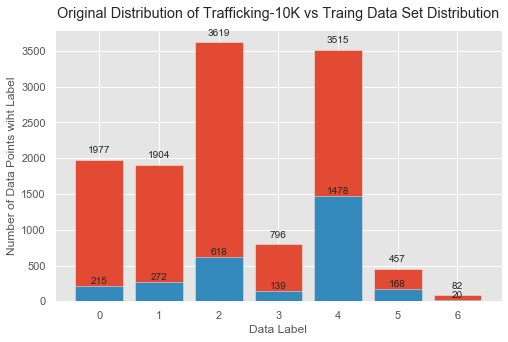

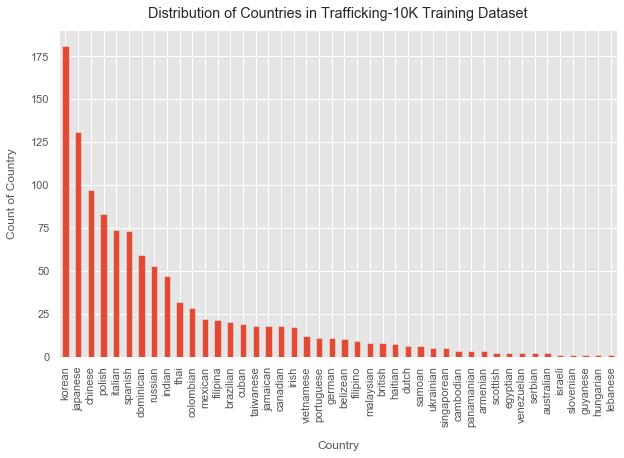

In [28]:
org = np.unique(m10k['label'], return_counts=True)
red = np.unique(m10k2['label'], return_counts=True)

fig, ax = plt.subplots(figsize=(8, 5))
org = ax.bar(org[0], org[1])
red = ax.bar(red[0], red[1])
ax.set_title("Original Distribution of Trafficking-10K vs Traing Data Set Distribution", y=1.02)
ax.set_xlabel("Data Label")
ax.set_ylabel("Number of Data Points wiht Label")
ax.set_xticks(np.arange(0,7,1))
autolabel(org,5)
autolabel(red,0)
plt.show()

m10k2['country'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel("Country", labelpad=14)
plt.ylabel("Count of Country", labelpad=14)
plt.title("Distribution of Countries in Trafficking-10K Training Dataset", y=1.02);
plt.show()

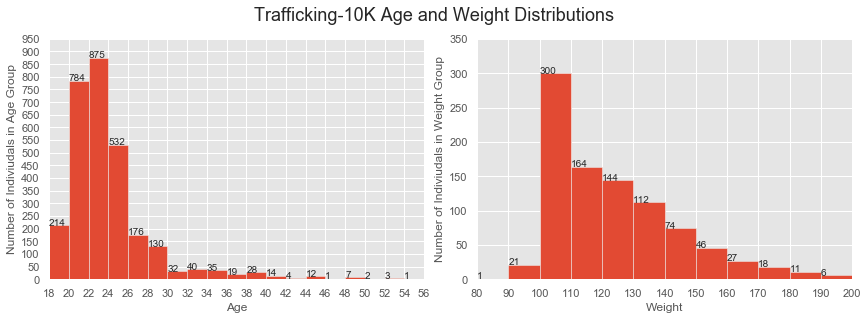

In [29]:
fig, (ax, ay)= plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Trafficking-10K Age and Weight Distributions', fontsize=18, y=1.08)

xbins_list = np.arange(18,58,2)

xcounts, xbins, xpatches = ax.hist(m10k2['age'], bins=xbins_list)
ax.set_xlim(18,56)
ax.set_xticks(xbins_list)
ax.set_yticks(np.arange(0,1000,50))
ax.set_xlabel("Age")
ax.set_ylabel("Number of Indiviudals in Age Group")

for i in range(len(xbins)-1):
    xbin_label = "{:.0f}".format(xcounts[i])
    ax.text(xbins[i], xcounts[i], xbin_label)

ybins_list = np.arange(80,210,10)
ycounts, ybins, ypatches = ay.hist(m10k2['weight'], bins=ybins_list)
ay.set_xlim(80,200)
ay.set_xticks(ybins_list)
ay.set_yticks(np.arange(0,400,50))
ay.set_xlabel("Weight")
ay.set_ylabel("Number of Indiviudals in Weight Group")

for i in range(len(ybins)-1):
    ybin_label = "{:.0f}".format(ycounts[i])
    ay.text(ybins[i], ycounts[i], ybin_label)

fig.tight_layout(pad=0.5)
plt.show()

# Webscrape Data Cleaning

In [30]:
webscrape.head()

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,Location,IsDuplicate
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,No specific location 🚌 🚘,1
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,Houston,1
2,"Houston, TX",hi ❤i am 💯 available for full service ♒🍆🍆🍆🍑 🍑🍑🍑💦💦no restrictions �,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707377-hi-i-am-available-for-full-service-no-restrictions-.html,"Naughty white girl that'll take you to ecstasy! Relax your mind, body, and soul all at the same time! Let me show you what quality feels like! Not only do I have amazing body, I'm sexy, seductive, discreet, experienced, open minded, Party & 420 Friendly. ❤🧡💯 My Top service💕💕 🍎 with or without condom What you like🍎 Handjob⭐ Best ****⫸Hand Release⫸⭐Specialy **** your own style. I'm available day & night for your pleasure! Excellent hygiene! Available 24hrs for Incall and Outcall .+1(385 626 6492) Age, race, status, size No Matter...Ready to satisfy all your desires- B2B .doggy style🥰💋.... busty party...Shower together ..BBBJ ..New 69👅 style ..Kissing..touching **** ..Nuru massage! I am always available Text me ONLY if you're serious +1( 3856266492",Lina❤️,Female,27,Straight,"Blowjob🍆, anal🍆, hardcore🍆, 69💦,doggy👅,Riding🥰,Cardate 🚚💦,Cumshot🍭,Squirting🧲",Men/Women/Couples,No,1
3,"Houston, TX",Hook up,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707307-Hook-up.html,"Heyyoo❤️,I’m linda, 29 yrs... I’m looking for a big huge **** I’m gonna ride so good 🙊😋😋🍆🍆..My **** is dripping wet and Ready To stick your di€k🍆 in baby. Come stick my butt 🍑I do Bdsm, Bbbj, ****, Hfs, **** and bareback. I’m always ready for hookup. ***Incalls / outcalls / Car Calls / Hotel / Motel are all services provided *** I am willing to drive up to 50 miles to outcall locations .🚗 👉If you’r serious, Not looking for chat games please ‘Contact with me:-➜ (918) 300-0281 , Snapchat ID : andrey_lind",Linda andrey,Female,29,Straight,Hook up,Men/Women/Couples,Texas,1
4,"Houston, TX",I’m Available for both Incall and outcall hotlizzy❤️💝🍆🍆🍆🍆 (917) 633-5298,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1706887-I-m-Available-for-both-Incall-and-outcall-hotlizzy-917-633-5298.html,"Hey My Name is Lizzy 🍬🍭😋 Age: 33💖 indulge in the perfect Package ✨🍭 that I guarantee you'll love come back running for more 💋💋✨ ✔ Real 💯✔ Sexy 💯✔ Discreet 💯💋 Available For Men who desire the best in Companionships ‼️ Serious Inquiries only 💋 Playful 🌟 5 star enjoyment 💯 Professional Safe 💯 💕 Beautiful Smooth Body A Mesmerizing face 💕 Ill leave you satisfied from the 

In [31]:
#import demoji
#demoji.download_codes() 

#webscrape['emojis'] = webscrape['Text']

#for entry in range(len(webscrape)):
  #print(entry)
 ## webscrape['emojis'][entry] = demoji.findall(webscrape['emojis'][entry])

#webscrape['Text'] = emoji.demojize(webscrape['Text'], delimiters=("", ""))

In [32]:
webscrape['body_no_emojis'] = webscrape['Text']
webscrape['title_no_emojis'] = webscrape['Title']

for entry in range(len(webscrape)):
 #print(webscrape['Text'][entry])
 webscrape['body_no_emojis'][entry] = emoji.demojize(webscrape['Text'][entry], delimiters=(" ", " ")) 
 webscrape['title_no_emojis'][entry] = emoji.demojize(webscrape['Title'][entry], delimiters=(" ", " ")) 

webscrape['body_no_emojis'] = webscrape['body_no_emojis'].str.lower()
webscrape['title_no_emojis'] = webscrape['title_no_emojis'].str.lower()

/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
import re
webscrape['body_no_emojis'] = webscrape['body_no_emojis'].str.replace('<br>','').str.replace('<br','').str.replace('</br>','').str.replace('\n','')
webscrape['title_no_emojis'] = webscrape['title_no_emojis'].str.replace('<br>','').str.replace('<br','').str.replace('</br>','').str.replace('\n','')

regex = re.compile('[^a-zA-Z\s\w]')
webscrape['body_text_only'] = webscrape['body_no_emojis'].str.replace(r'[^a-zA-Z\s\d]', "")
webscrape['title_text_only'] = webscrape['title_no_emojis'].str.replace(r'[^a-zA-Z\s\d]', "")

webscrape.head()

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,Location,IsDuplicate,body_no_emojis,title_no_emojis,body_text_only,title_text_only
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,No specific location 🚌 🚘,1,two_hearts hey y’all two_hearts face_savoring_food i’m kimberly and i’m here to please you and make your night like no other. i’m 100% real and i’m all about good business. my goal is to make you happy and satisfied. smiling_cat_face_with_heart-eyes no lawenforcement smiling_face_with_heart-eyes gem_stone i’m always available 24/7 mobile_phone_with_arrow +1(631)378-9267 safe and discreet gem_stone incalls available. gem_stone outcall available upon request sparkles no drama heavy_large_circle no blocked calls heavy_large_circle no games. come see what you are missing out on peach eggplant peach backhand_index_pointing_right ok_hand kiss_mark do not hesitate to call: telephone +1(631)378-9267 or text: mobile_phone_with_arrow +1(631)378-926,꧂ i am available for outcall and incall ꧂ collision collision wet **** peach lollipop sexy mobile_phone_with_arrow +1(631)378-9267,twohearts hey yall twohearts facesavoringfood im kimberly and im here to please you and make your night like no other im 100 real and im all about good business my goal is to make you happy and satisfied smilingcatfacewithhearteyes no lawenforcement smilingfacewithhearteyes gemstone im always available 247 mobilephonewitharrow 16313789267 safe and discreet gemstone incalls available gemstone outcall available upon request sparkles no drama heavylargecircle no blocked calls heavylargecircle no games come see what you are missing out on peach eggplant peach backhandindexpointingright okhand kissmark do not hesitate to call telephone 16313789267 or text mobilephonewitharrow 1631378926,i am available for outcall and incall collision collision wet peach lollipop sexy mobilephonewitharrow 16313789267
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,Houston,1,"hi i’m isabella rolland really sweet and polite tongue i wanna do things just the way you will love it kiss_mark can you **** with me tonight ,i want to fulfill your widest fantasies tongue smiling_face_with_heart-eyes will give you my full service such as hardcore,**** ,hj , **** **** ,breast **** and many more tongue smiling_face_with_heart-eyes super open minded looking to have fun with grown respectful gentlemen only,i’m hundred_points real , smiling_face_with_heart-eyes smiling_face_with_heart-eyes i'm always availabl","sweet and hot and juicy , ready for *** kiss_mark kiss_mark kiss_mark (405) 456 9045",hi im isabella rollan

## Get Weight Value

In [34]:
import re

try:
  webscrape['weight1'] = webscrape['body_no_emojis'].str.findall('weight : (\d+)')
  webscrape['weight2'] = webscrape['body_no_emojis'].str.findall(r'(\d+) ?lbs')
  webscrape['weight3'] = webscrape['body_no_emojis'].str.findall(r'(\d+) ?kg')
except:
  webscrape['weight1'] = 0
  webscrape['weight2'] = 0
  webscrape['weight3'] = 0
  

webscrape['weight'] = webscrape['weight1'] + webscrape['weight2'] + webscrape['weight3']
webscrape['weight'] = webscrape['weight'].apply(lambda x: max(x, default=0)).astype(int)
webscrape = webscrape.drop(['weight1', 'weight2', 'weight3'], axis=1)

webscrape['weight_below_115'] = np.where(((webscrape['weight'] <= 115) & (webscrape['weight'] >50)), 1, 0)

webscrape.head(5)

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,Location,IsDuplicate,body_no_emojis,title_no_emojis,body_text_only,title_text_only,weight,weight_below_115
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,No specific location 🚌 🚘,1,two_hearts hey y’all two_hearts face_savoring_food i’m kimberly and i’m here to please you and make your night like no other. i’m 100% real and i’m all about good business. my goal is to make you happy and satisfied. smiling_cat_face_with_heart-eyes no lawenforcement smiling_face_with_heart-eyes gem_stone i’m always available 24/7 mobile_phone_with_arrow +1(631)378-9267 safe and discreet gem_stone incalls available. gem_stone outcall available upon request sparkles no drama heavy_large_circle no blocked calls heavy_large_circle no games. come see what you are missing out on peach eggplant peach backhand_index_pointing_right ok_hand kiss_mark do not hesitate to call: telephone +1(631)378-9267 or text: mobile_phone_with_arrow +1(631)378-926,꧂ i am available for outcall and incall ꧂ collision collision wet **** peach lollipop sexy mobile_phone_with_arrow +1(631)378-9267,twohearts hey yall twohearts facesavoringfood im kimberly and im here to please you and make your night like no other im 100 real and im all about good business my goal is to make you happy and satisfied smilingcatfacewithhearteyes no lawenforcement smilingfacewithhearteyes gemstone im always available 247 mobilephonewitharrow 16313789267 safe and discreet gemstone incalls available gemstone outcall available upon request sparkles no drama heavylargecircle no blocked calls heavylargecircle no games come see what you are missing out on peach eggplant peach backhandindexpointingright okhand kissmark do not hesitate to call telephone 16313789267 or text mobilephonewitharrow 1631378926,i am available for outcall and incall collision collision wet peach lollipop sexy mobilephonewitharrow 16313789267,0,0
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,Houston,1,"hi i’m isabella rolland really sweet and polite tongue i wanna do things just the way you will love it kiss_mark can you **** with me tonight ,i want to fulfill your widest fantasies tongue smiling_face_with_heart-eyes will give you my full service such as hardcore,**** ,hj , **** **** ,breast **** and many more tongue smiling_face_with_heart-eyes super open minded looking to have fun with grown respectful gentlemen only,i’m hundred_points real , smiling_face_with_heart-eyes smiling_face_with_heart-eyes i'm always availabl","sweet and hot and juicy , ready for *** kiss_mark kiss_mark kiss_mark (405) 456

## Get Country

In [35]:
webscrape['country'] = webscrape['body_no_emojis'].str.findall("|".join(country))
webscrape['continent'] = webscrape['body_no_emojis'].str.findall("|".join(continent))

webscrape['country'] = webscrape['country'].apply(lambda x: np.nan if len(x)==0 else x[0])
webscrape['continent'] = webscrape['continent'].apply(lambda x: np.nan if len(x)==0 else x[0])

webscrape.head(2)

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,Location,IsDuplicate,body_no_emojis,title_no_emojis,body_text_only,title_text_only,weight,weight_below_115,country,continent
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,No specific location 🚌 🚘,1,two_hearts hey y’all two_hearts face_savoring_food i’m kimberly and i’m here to please you and make your night like no other. i’m 100% real and i’m all about good business. my goal is to make you happy and satisfied. smiling_cat_face_with_heart-eyes no lawenforcement smiling_face_with_heart-eyes gem_stone i’m always available 24/7 mobile_phone_with_arrow +1(631)378-9267 safe and discreet gem_stone incalls available. gem_stone outcall available upon request sparkles no drama heavy_large_circle no blocked calls heavy_large_circle no games. come see what you are missing out on peach eggplant peach backhand_index_pointing_right ok_hand kiss_mark do not hesitate to call: telephone +1(631)378-9267 or text: mobile_phone_with_arrow +1(631)378-926,꧂ i am available for outcall and incall ꧂ collision collision wet **** peach lollipop sexy mobile_phone_with_arrow +1(631)378-9267,twohearts hey yall twohearts facesavoringfood im kimberly and im here to please you and make your night like no other im 100 real and im all about good business my goal is to make you happy and satisfied smilingcatfacewithhearteyes no lawenforcement smilingfacewithhearteyes gemstone im always available 247 mobilephonewitharrow 16313789267 safe and discreet gemstone incalls available gemstone outcall available upon request sparkles no drama heavylargecircle no blocked calls heavylargecircle no games come see what you are missing out on peach eggplant peach backhandindexpointingright okhand kissmark do not hesitate to call telephone 16313789267 or text mobilephonewitharrow 1631378926,i am available for outcall and incall collision collision wet peach lollipop sexy mobilephonewitharrow 16313789267,0,0,NaN,NaN
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,Houston,1,"hi i’m isabella rolland really sweet and polite tongue i wanna do things just the way you will love it kiss_mark can you **** with me tonight ,i want to fulfill your widest fantasies tongue smiling_face_with_heart-eyes will give you my full service such as hardcore,**** ,hj , **** **** ,breast **** and many more tongue smiling_face_with_heart-eyes super open minded looking to have fun with grown respectful gentlemen only,i’m hundred_points real , smiling_face_with_heart-eyes smiling_face_with_heart-eyes i'm always availabl","sweet and hot and juicy , ready for *** kiss_mark kis

## Get Websites/Massage References

In [36]:
#ALTERNATIVE TO LOOP
webscrape['website'] = webscrape['body_no_emojis'].apply(extractor.find_urls)
webscrape['website'] = webscrape['website'].apply(lambda x: np.nan if len(x)==0 else x)

webscrape['massage_URL'] = webscrape['body_no_emojis'].str.findall("|".join(massage_text))
webscrape['massage_URL'] = webscrape['website'].apply(lambda x: 1 if x=='NaN' else 0)

In [37]:
webscrape[['body_no_emojis','website','massage_URL']].head(5)

,body_no_emojis,website,massage_URL
0,two_hearts hey y’all two_hearts face_savoring_food i’m kimberly and i’m here to please you and make your night like no other. i’m 100% real and i’m all about good business. my goal is to make you happy and satisfied. smiling_cat_face_with_heart-eyes no lawenforcement smiling_face_with_heart-eyes gem_stone i’m always available 24/7 mobile_phone_with_arrow +1(631)378-9267 safe and discreet gem_stone incalls available. gem_stone outcall available upon request sparkles no drama heavy_large_circle no blocked calls heavy_large_circle no games. come see what you are missing out on peach eggplant peach backhand_index_pointing_right ok_hand kiss_mark do not hesitate to call: telephone +1(631)378-9267 or text: mobile_phone_with_arrow +1(631)378-926,NaN,0
1,"hi i’m isabella rolland really sweet and polite tongue i wanna do things just the way you will love it kiss_mark can you **** with me tonight ,i want to fulfill your widest fantasies tongue smiling_face_with_heart-eyes will give you my full service such as hardcore,**** ,hj , **** **** ,breast **** and many more tongue smiling_face_with_heart-eyes super open minded looking to have fun with grown respectful gentlemen only,i’m hundred_points real , smiling_face_with_heart-eyes smiling_face_with_heart-eyes i'm always availabl",NaN,0
2,"naughty white girl that'll take you to ecstasy! relax your mind, body, and soul all at the same time! let me show you what quality feels like! not only do i have amazing body, i'm sexy, seductive, discreet, experienced, open minded, party & 420 friendly. red_heart orange_heart hundred_points my top service two_hearts two_hearts red_apple with or without condom what you like red_apple handjob white_medium_star best ****⫸hand release⫸ white_medium_star specialy **** your own style. i'm available day & night for your pleasure! excellent hygiene! available 24hrs for incall and outcall .+1(385 626 6492) age, race, status, size no matter...ready to satisfy all your desires- b2b .doggy style smiling_face_with_3_hearts kiss_mark .... busty party...shower together ..bbbj ..new 69 tongue style ..kissing..touching **** ..nuru massage! i am always available text me only if you're serious +1( 3856266492",NaN,0
3,"heyyoo red_heart ,i’m linda, 29 yrs... i’m looking for a big huge **** i’m gonna ride so good speak-no-evil_monkey face_savoring_food face_savoring_food eggplant eggplant ..my **** is dripping wet and ready to stick your di€k eggplant in baby. come stick my butt peach i do bdsm, bbbj, ****, hfs, **** and bareback. i’m always ready for hookup. ***incalls / outcalls / car calls / hotel / motel are all services provided *** i am willing to drive up to 50 miles to outcall locations . automobile backhand_index_pointing_right if you’r serious, not looking for chat games please ‘contact with me:-➜ (918) 300-0281 , snapchat id : andrey_lind",NaN,0
4,"hey my name is lizzy candy lollipop face_savoring_food age: 33 sparkling_heart indulge in the perfect package sparkles lollipop that i guarantee you'll love come back running for more kiss_mark kiss_mark sparkles heavy_check_mark real hundred_points heavy_check_mark sexy hundred_points heavy_check_mark discreet hundred_points kiss_mark available for men who desire the best in companionships double_exclamation_mark serious inquiries only kiss_mark playful glowing_star 5 star enjoyment hundred_points professional safe hundred_points two_hearts beautiful smooth body a mesmerizing face two_hearts ill leave you satisfied from the moment we meet kiss_mark two_hearts airplane catch me while you can airplane heavy_check_mark heavy_check_mark sparkles 100% independent gem_stone sparkles cleanclassy ribbon crown sparkles 100% real pictures camera_with_flash film_frames eyes sparkles great hygiene face_with_tongue lollipop dont hesitate to call or text (917) 633-5298 services: incall, outcall, car date, 2some, 69, ****, fwb, ****, and lots more. am submissive so you can try style with me. i can

In [38]:
webscrape['massage_text'] = webscrape['body_text_only'].str.count("|".join(massage_text))

In [39]:
display(webscrape[webscrape['massage_text'] >= 1])

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,title_no_emojis,body_text_only,title_text_only,weight,weight_below_115,country,continent,website,massage_URL,massage_text
2,"Houston, TX",hi ❤i am 💯 available for full service ♒🍆🍆🍆🍑 🍑🍑🍑💦💦no restrictions �,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707377-hi-i-am-available-for-full-service-no-restrictions-.html,"Naughty white girl that'll take you to ecstasy! Relax your mind, body, and soul all at the same time! Let me show you what quality feels like! Not only do I have amazing body, I'm sexy, seductive, discreet, experienced, open minded, Party & 420 Friendly. ❤🧡💯 My Top service💕💕 🍎 with or without condom What you like🍎 Handjob⭐ Best ****⫸Hand Release⫸⭐Specialy **** your own style. I'm available day & night for your pleasure! Excellent hygiene! Available 24hrs for Incall and Outcall .+1(385 626 6492) Age, race, status, size No Matter...Ready to satisfy all your desires- B2B .doggy style🥰💋.... busty party...Shower together ..BBBJ ..New 69👅 style ..Kissing..touching **** ..Nuru massage! I am always available Text me ONLY if you're serious +1( 3856266492",Lina❤️,Female,27,Straight,"Blowjob🍆, anal🍆, hardcore🍆, 69💦,doggy👅,Riding🥰,Cardate 🚚💦,Cumshot🍭,Squirting🧲",Men/Women/Couples,...,hi red_heart i am hundred_points available for full service aquarius eggplant eggplant eggplant peach peach peach peach sweat_droplets sweat_droplets no restrictions �,naughty white girl thatll take you to ecstasy relax your mind body and soul all at the same time let me show you what quality feels like not only do i have amazing body im sexy seductive discreet experienced open minded party 420 friendly redheart orangeheart hundredpoints my top service twohearts twohearts redapple with or without condom what you like redapple handjob whitemediumstar best hand release whitemediumstar specialy your own style im available day night for your pleasure excellent hygiene available 24hrs for incall and outcall 1385 626 6492 age race status size no matterready to satisfy all your desires b2b doggy style smilingfacewith3hearts kissmark busty partyshower together bbbj new 69 tongue style kissingtouching nuru massage i am always available text me only if youre serious 1 3856266492,hi redheart i am hundredpoints available for full service aquarius eggplant eggplant eggplant peach peach peach peach sweatdroplets sweatdroplets no restrictions,0,0,NaN,NaN,NaN,0,1
11,"Houston, TX",😋🍌🍆SWEETEST & SEXY GIRL🍒WITH🍓A NICE🍑BOOTY🤩🍑NO RESTRICTION💋😋,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1704343--SWEETEST-amp-SEXY-GIRL-WITH-A-NICE-BOOTY-NO-RESTRICTION-.html,"Hello Guys, I Like Succking & Cuddling With emotion touching. I'll suckk your dickk and you will fuckk my pu$syy. Need your c0Ck without condom. 🔴🔴▬🔴🔴 Available: daytime & night time. 🔴🔴▬🔴🔴 💖💖 i have $exy body,big A$s,Nice b00bs, pink clean pu$sy. See my all picture then knock me. 💖💖 NURU MASSAGE WITH AROMATHERAPY 💖💖 I live alone in my home. You can come to my house or anywhere you like. 💖💖 Im always ready for fun and discreet $ex with a young or older man. 💖💖 You will definitely enjoy my b00bs I'm enjoy the $ex all the time. 💖💖 D0ggy Style Fuuuuuck & Full Night Enjoy 💖 Shower $ex with many Position?? 💖",Marissa ❤️ Lina,Female,28,Straight,"Anal sex🍆,Cowgirl🍌,Hottest🍊Doggy,🍆69,Hottest Ride🍑! Sweetest Moan🍑,Banana🍌 Split, 💦ArmChair Traveler🍓, Suck Your Nipple🔥&Cardate🚘",Men/Women/Couples,...,face_savoring_food banana eggplant sweetest & sexy girl cherries with strawberry a nice peach booty star-struck peach no restriction kiss_mark face_savoring_food,hello guys i like succking cuddling with emotion touching ill suckk your dickk and you will fuckk my pusyy need your c0ck without condom redcircle redcircle redcircle redcircle available daytime night time redcircle redcircle redcircle redcircle sparklingheart sparklingheart i have exy bodybig asnice b00bs pink clean pusy see my all picture then 

## Minors, Transcient, Unconventional Sex, Organized Crime

In [40]:
webscrape['minor_indicator_body'] = webscrape['body_text_only'].str.count("|".join(minor_indicator)).fillna(0).astype(int)
webscrape['minor_indicator_title'] = webscrape['title_text_only'].str.count("|".join(minor_indicator)).fillna(0).astype(int)

webscrape['organized_body'] = webscrape['body_text_only'].str.count("|".join(organized)).fillna(0).astype(int)
webscrape['organized_title'] = webscrape['title_text_only'].str.count("|".join(organized)).fillna(0).astype(int)

webscrape['unconventional_sex_body'] = webscrape['body_text_only'].str.count("|".join(unconventional_sex)).fillna(0).astype(int)
webscrape['unconventional_sex_title'] = webscrape['title_text_only'].str.count("|".join(unconventional_sex)).fillna(0).astype(int)

webscrape['transient_body'] = webscrape['body_text_only'].str.count("|".join(transient)).fillna(0).astype(int)
webscrape['transient_title'] = webscrape['title_text_only'].str.count("|".join(transient)).fillna(0).astype(int)

webscrape['organized'] = (webscrape['organized_body'] + webscrape['organized_title'])
webscrape['minor_indicator'] = (webscrape['minor_indicator_body'] + webscrape['minor_indicator_title'])
webscrape['unconventional_sex'] = (webscrape['unconventional_sex_body'] + webscrape['unconventional_sex_title'])
webscrape['transient'] = (webscrape['transient_body'] + webscrape['transient_title'])

webscrape = webscrape.drop(columns=['organized_body', 'organized_title', 'unconventional_sex_body', 'unconventional_sex_title', 
                                    'transient_body', 'transient_title','minor_indicator_body','minor_indicator_title'])

display(webscrape[webscrape['organized']>1])

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,...,0,NaN,NaN,NaN,0,0,3,1,0,0
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,...,0,NaN,NaN,NaN,0,0,2,2,1,0
2,"Houston, TX",hi ❤i am 💯 available for full service ♒🍆🍆🍆🍑 🍑🍑🍑💦💦no restrictions �,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707377-hi-i-am-available-for-full-service-no-restrictions-.html,"Naughty white girl that'll take you to ecstasy! Relax your mind, body, and soul all at the same time! Let me show you what quality feels like! Not only do I have amazing body, I'm sexy, seductive, discreet, experienced, open minded, Party & 420 Friendly. ❤🧡💯 My Top service💕💕 🍎 with or without condom What you like🍎 Handjob⭐ Best ****⫸Hand Release⫸⭐Specialy **** your own style. I'm available day & night for your pleasure! Excellent hygiene! Available 24hrs for Incall and Outcall .+1(385 626 6492) Age, race, status, size No Matter...Ready to satisfy all your desires- B2B .doggy style🥰💋.... busty party...Shower together ..BBBJ ..New 69👅 style ..Kissing..touching **** ..Nuru massage! I am always available Text me ONLY if you're serious +1( 3856266492",Lina❤️,Female,27,Straight,"Blowjob🍆, anal🍆, hardcore🍆, 69💦,doggy👅,Riding🥰,Cardate 🚚💦,Cumshot🍭,Squirting🧲",Men/Women/Couples,...,0,NaN,NaN,NaN,0,1,3,0,1,0
3,"Houston, TX",Hook up,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707307-Hook-up.html,"Heyyoo❤️,I’m linda, 29 yrs... I’m looking for a big huge **** I’m gonna ride so good 🙊😋😋🍆🍆..My **** is dripping wet and Ready To stick your di€k🍆 in baby. Come stick my butt 🍑I do Bdsm, Bbbj, ****, Hfs, **** and bareback. I’m always ready for hookup. ***Incalls / outcalls / Car Calls / Hotel / Motel are all services provided *** I am willing to drive up to 50 miles to outcall locations .🚗 👉If you’r serious, Not looking for chat games please ‘Contact with me:-➜ (918) 300-0281 , Snapchat ID : andrey_lind",Linda andrey,Female,29,Straight,Hook up,Men/Women/Couples,...,0,NaN,NaN,NaN,0,0,2,0,0,0
4,"Houston, TX",I’m Available for both Incall and outcall hotlizzy❤️💝🍆🍆🍆🍆 (917) 633-5298,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1706887-I-m-Available-for-both-Incall-and-outcall-hotlizzy-917-633-5298.html,"Hey My Name is Lizzy 🍬🍭😋 Age: 33💖 indulge in the perfect Package ✨🍭 that I guarantee you'll love come back running for more 💋💋✨ ✔ Real 💯✔ Sexy 💯✔ Discreet 💯💋 Available For Men who desire the be

In [41]:
display(webscrape[webscrape['country'] == 'french'])

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient


## Graphing Data

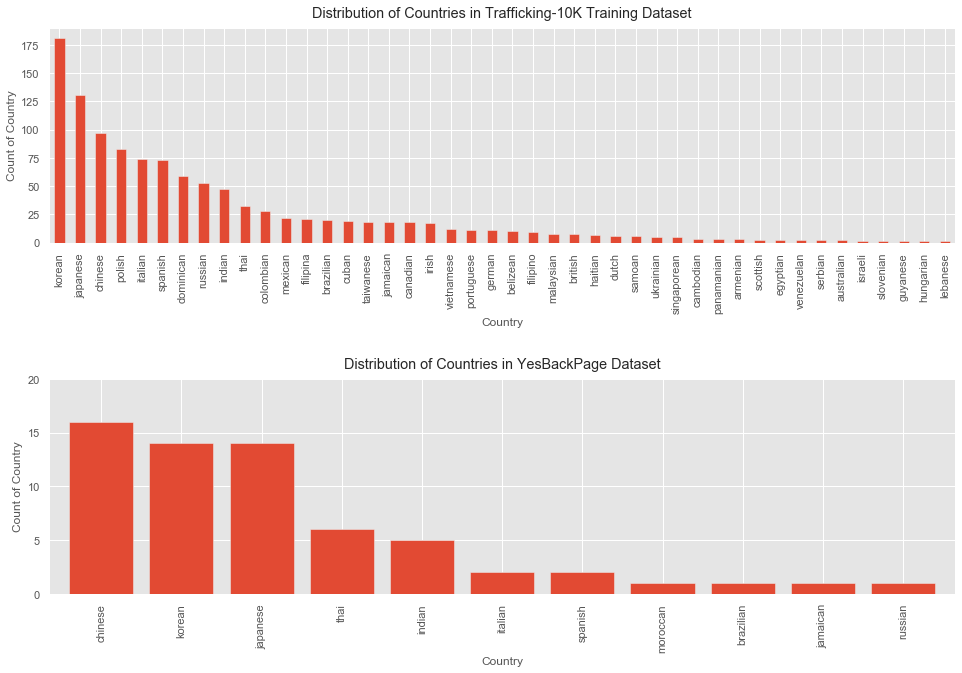

In [42]:
fig, (ax,ay) = plt.subplots(2,1, figsize=(14,10))

m10k2_country = m10k2['country'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Count of Country")
ax.set_title("Distribution of Countries in Trafficking-10K Training Dataset", y=1.02);

webscrape_country = webscrape['country'].value_counts().plot(kind='bar', ax=ay, width=0.8)
ay.set_xlabel("Country")
ay.set_ylabel("Count of Country")
ay.set_yticks(np.arange(0,25,5))
ay.set_title("Distribution of Countries in YesBackPage Dataset", y=1.02);
fig.tight_layout(pad=3.0)
plt.show()

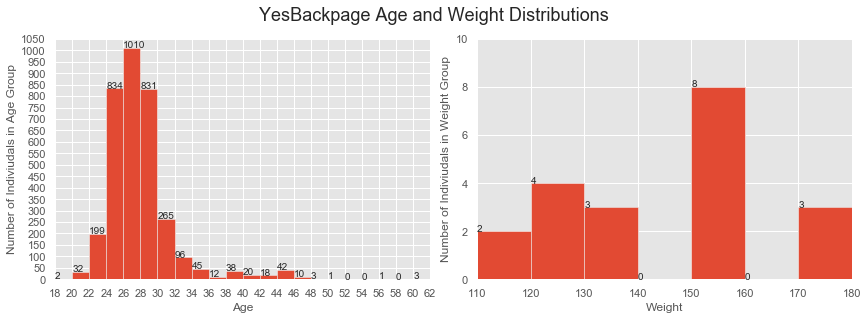

In [43]:
fig, (ax, ay)= plt.subplots(1,2, figsize=(12,4))
fig.suptitle('YesBackpage Age and Weight Distributions', fontsize=18, y=1.08)

xbins_list = np.arange(18,64,2)

xcounts, xbins, xpatches = ax.hist(webscrape['Age'], bins=xbins_list)
ax.set_xlim(18,62)
ax.set_xticks(xbins_list)
ax.set_yticks(np.arange(0,1100,50))
ax.set_ylim(0,1050)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Indiviudals in Age Group")

for i in range(len(xbins)-1):
    xbin_label = "{:.0f}".format(xcounts[i])
    ax.text(xbins[i], xcounts[i], xbin_label)

ybins_list = np.arange(110,190,10)
ycounts, ybins, ypatches = ay.hist(webscrape['weight'], bins=ybins_list)
ay.set_xlim(110,180)
ay.set_ylim(0,10)
ay.set_xticks(ybins_list)
ay.set_yticks(np.arange(0,12,2))
ay.set_xlabel("Weight")
ay.set_ylabel("Number of Indiviudals in Weight Group")

for i in range(len(ybins)-1):
    ybin_label = "{:.0f}".format(ycounts[i])
    ay.text(ybins[i], ycounts[i], ybin_label)

fig.tight_layout(pad=0.5)
plt.show()

# Modeling

## Create Dummy Variables for Non-Ints/Floats

In [44]:
webscrape.dtypes

City                     object
Title                    object
URL                      object
Text                     object
Name                     object
Sex                      object
Age                      int64 
Sexual Orientation       object
Services                 object
Services Provided For    object
Location                 object
IsDuplicate              int64 
body_no_emojis           object
title_no_emojis          object
body_text_only           object
title_text_only          object
weight                   int64 
weight_below_115         int64 
country                  object
continent                object
website                  object
massage_URL              int64 
massage_text             int64 
organized                int64 
minor_indicator          int64 
unconventional_sex       int64 
transient                int64 
dtype: object

In [45]:
webscrape_model = webscrape[['Age', 'weight', 'weight_below_115', 'country', 'continent', 'massage_URL', 'massage_text', 'organized', 'minor_indicator', 'transient', 'unconventional_sex']]
webscrape_model.head()



,Age,weight,weight_below_115,country,continent,massage_URL,massage_text,organized,minor_indicator,transient,unconventional_sex
0,27,0,0,NaN,NaN,0,0,3,1,0,0
1,28,0,0,NaN,NaN,0,0,2,2,0,1
2,27,0,0,NaN,NaN,0,1,3,0,0,1
3,29,0,0,NaN,NaN,0,0,2,0,0,0
4,33,0,0,NaN,NaN,0,0,7,5,1,0


In [46]:
#Categorical Dummy Variables
webscrape_model = pd.get_dummies(webscrape_model, columns=['country'])
webscrape_model = pd.get_dummies(webscrape_model, columns=['continent'])

In [47]:
#webscrape[webscrape['IsDuplicate'] == 1].head(25)

In [48]:
#m10k2.head(5)

In [49]:
m10k2['label2'] = 1
m10k2['label2'] = np.where((m10k2['label'] >= 3), 2, m10k2.label2)
m10k2['label2'] = np.where((m10k2['label'] >= 5), 3, m10k2.label2)

In [50]:
m10k2_model = m10k2[['label','age', 'country','weight_below_115', 'continent', 'massage_URL', 'massage_text', 'organized', 'minor_indicator','transient', 'unconventional_sex']]

In [51]:
m10k2_model['age'] = m10k2_model['age'].astype(int)
#m10k2_model['weight'] = m10k2_model['weight'].astype(int)
#m10k2_model.dtypes

/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
##Categorical variables to dummy variables 
m10k2_model = pd.get_dummies(m10k2_model, columns=['country'])
m10k2_model = pd.get_dummies(m10k2_model, columns=['continent'])
m10k2_model['country_moroccan'] = 0

In [53]:
##split training/test
x = m10k2_model.loc[:, m10k2_model.columns != 'label'].values
y = m10k2_model['label'].values

X_webscrape = webscrape_model.values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

## KNN

In [54]:
from sklearn import metrics
import time
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,6):
  knn = KNeighborsClassifier(n_neighbors = i)
  t1 = time.time()
  knn.fit(X_train, y_train)
  print("N-Neighbors: ", i)
  print("KNN Model: ", knn)
  print("training time: ", round(time.time()-t1, 3), "s")
  print("score: ", round(knn.score(X_test,y_test)*100,3),"%")

N-Neighbors:  1
KNN Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
training time:  0.012 s
score:  48.797 %
N-Neighbors:  2
KNN Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
training time:  0.006 s
score:  45.361 %
N-Neighbors:  3
KNN Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
training time:  0.006 s
score:  49.485 %
N-Neighbors:  4
KNN Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
training time:  0

In [55]:
KNN_pred = knn.predict(X_test)
print(metrics.classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.38      0.49      0.42        43
           1       0.18      0.19      0.18        54
           2       0.41      0.45      0.43       124
           3       0.00      0.00      0.00        28
           4       0.74      0.77      0.75       295
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         4

    accuracy                           0.54       582
   macro avg       0.24      0.27      0.26       582
weighted avg       0.51      0.54      0.52       582



In [56]:
#y_test['KNN_pred'] = KNN_pred

#df_out = pd.merge(m10k2,y_test[['KNN_pred']],how = 'left',left_index = True, right_index = True)

In [57]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 43,  54, 124,  28, 295,  34,   4]))

In [58]:
np.unique(KNN_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 56,  57, 135,  13, 310,  10,   1]))

In [59]:
#plt.hist(y_test, bins = 7, label ='Expected')
#plt.hist(KNN_pred,bins = 7, label = "Predicted")
#plt.title("K-NN Expected vs Predicted")
#plt.xlabel("Data Label")
#plt.ylabel("Number of Data Points wiht Label")
#plt.legend()
#plt.show()

## SVM

In [60]:
from sklearn import svm

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#Train the model using the training sets
for kern in kernels:
  t1 = time.time()
  svm_model = svm.SVC(kernel=kern) # choose appr kernel type
  
  print(kern)
  svm_model.fit(X_train, y_train)
  print("training time:", round(time.time()-t1, 3), "s")
  #Predict the response for test dataset
  SVM_pred = svm_model.predict(X_test)
  print("SVM Accuracy: ", round(metrics.accuracy_score(y_test, SVM_pred)*100,3),"%")

#{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} add these... 

linear
training time: 0.893 s
SVM Accuracy:  59.794 %
poly
training time: 0.603 s
SVM Accuracy:  53.952 %
rbf
training time: 0.566 s
SVM Accuracy:  56.186 %
sigmoid
training time: 0.586 s
SVM Accuracy:  47.079 %


In [61]:
np.unique(SVM_pred, return_counts=True)

(array([0, 2, 4, 5], dtype=int64), array([  1,  63, 476,  42]))

In [62]:
#fig, (ax,ay) = plt.subplots(1,2, figsize=(16, 5))
#fig.suptitle('SVM Expected vs Predicted')
#ax.hist(y_test, bins=7)
#ax.set_xlabel("Data Label", labelpad=14)
#ax.set_ylabel("Number of Data Points with Label", labelpad=14)
#ax.set_title("Expected Labels", y=1.02);

#ay.hist(SVM_pred, bins=7, color = "darkorange")
#ay.set_xlabel("Data Label", labelpad=14)
#ay.set_ylabel("Number of Data Points with Label", labelpad=14)
#ay.set_title("Predicted Labels", y=1.02);
#plt.show()

## Neural Network

In [63]:
from sklearn.neural_network import MLPClassifier
NNmodel = MLPClassifier(hidden_layer_sizes=(200, 10), max_iter = 10000,random_state=42)

t1 = time.time()
NNmodel.fit(X_train, y_train)
print("training time:", round(time.time()-t1, 3), "s")

NN_pred = NNmodel.predict(X_test) #predictions of model
print("Neural Network Accuracy: ", round(metrics.accuracy_score(y_test, NN_pred)*100,3),"%")

training time: 6.582 s
Neural Network Accuracy:  58.591 %


In [64]:
np.unique(NN_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64), array([ 39,  22, 197,  10, 312,   2]))

In [65]:
#fig, (ax,ay) = plt.subplots(1,2, figsize=(16, 5))
#fig.suptitle('Neural Network Expected vs Predicted')
#ax.hist(y_test, bins=7)
#ax.set_xlabel("Data Label", labelpad=14)
#ax.set_ylabel("Number of Data Points with Label", labelpad=14)
#ax.set_title("Expected Labels", y=1.02);

#y.hist(NN_pred, bins=7, color = "darkorange")
#ay.set_xlabel("Data Label", labelpad=14)
#ay.set_ylabel("Number of Data Points with Label", labelpad=14)
#ay.set_title("Predicted Labels", y=1.02);
#plt.show()

In [66]:
#remove
#label, testcounts = np.unique(y_test, return_counts=True)
#labels, predcounts = np.unique(NN_pred, return_counts=True)
#print(np.asarray((unique, counts)).T)
#import matplotlib.pyplot as plt
#plt.bar(unique, counts)
#np.append(predcounts, 0)
#label = label.tolist()
#testcounts = testcounts.tolist()
#predcounts = predcounts.tolist()
#predcounts.append(0)
#predcounts[0:3]
#print(predcounts)
#x = np.arange(len(label))  # the label locations
#width = 0.35  # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - 0.5, testcounts, 1, label='test')
#rects2 = ax.bar(x + 0.5, predcounts, 1, label='pred')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Counts')
#ax.set_title('Counts')
#ax.set_xticks(x)
#ax.set_xticklabels(label)
#ax.legend()


#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

#fig.tight_layout()

#plt.show()

## Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

t1 = time.time()
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)
print("training time:", round(time.time()-t1, 3), "s")

GNB_pred = gb_model.predict(X_test)
print("Predicted Value:", GNB_pred)
print("Accuracy:",metrics.accuracy_score(y_test, GNB_pred))

training time: 0.005 s
Predicted Value: [0 5 6 5 6 6 5 6 6 5 6 5 6 3 6 6 6 6 6 6 5 6 0 5 6 6 5 5 5 6 3 0 6 5 5 5 6
 0 6 5 6 6 5 3 5 6 5 6 5 5 5 3 6 6 6 5 5 6 5 6 6 3 6 6 5 0 6 6 6 6 5 5 6 6
 5 6 6 6 6 5 3 6 6 5 5 6 6 5 6 5 5 6 5 6 6 0 6 6 6 6 2 6 0 6 5 5 6 6 5 5 5
 5 5 6 6 3 5 6 5 5 3 5 5 5 6 2 6 6 0 5 6 6 5 6 6 6 5 3 5 6 5 6 6 3 6 5 6 6
 5 5 0 5 2 5 5 3 6 6 6 5 3 5 6 6 5 6 6 6 3 6 6 3 6 5 5 6 6 6 5 3 6 6 5 5 6
 6 6 5 6 0 6 5 6 0 6 5 6 5 6 0 6 6 0 4 5 6 3 6 5 5 5 0 5 3 6 6 5 6 5 6 6 6
 5 5 6 6 5 6 6 6 6 5 6 5 5 5 6 0 5 0 3 5 5 5 6 5 5 6 5 5 6 5 6 6 2 6 5 6 3
 6 5 6 5 2 4 2 6 6 5 5 6 3 0 6 3 5 6 5 3 5 6 6 3 5 5 6 6 5 6 3 6 0 5 6 4 6
 6 5 5 5 5 0 0 6 5 6 6 6 5 5 6 6 6 6 3 3 5 3 6 5 6 6 6 5 5 5 6 6 6 6 6 6 5
 6 5 6 3 6 0 6 6 6 6 6 6 6 6 6 3 5 6 6 6 5 5 6 6 5 6 6 6 0 5 5 5 6 6 6 5 6
 6 6 5 6 0 5 6 3 0 6 6 5 5 6 6 6 5 6 6 6 5 5 6 6 6 5 6 5 6 6 6 6 6 6 0 6 3
 6 6 6 6 3 6 3 5 6 6 6 6 6 6 5 6 6 6 5 5 5 6 5 4 6 5 5 5 5 5 6 6 5 5 3 3 3
 3 5 6 6 6 5 6 6 6 6 6 6 5 5 3 6 5 6 6 4 6 6 5 6 6 5 6 6 6 6

In [68]:
#creating labelEncoder (REMOVE?)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

m10k2_GNB = m10k2[['label','age', 'country','weight_below_115', 'continent', 'massage_URL','massage_text', 'organized', 'minor_indicator','transient', 'unconventional_sex']]

m10k2_GNB['country']=le.fit_transform(m10k2_GNB['country'].tolist())
m10k2_GNB['continent']=le.fit_transform(m10k2_GNB['continent'].tolist())


m10k2_GNB.head()
#m10k2[['label','age', 'country','weight_below_115', 'continent', 'massage_URL', 'massage_text', 'organized', 'minor_indicator','transient', 'unconventional_sex']]

x_GNB = m10k2_GNB.loc[:, m10k2_GNB.columns != 'label'].values
y_GNB = m10k2_GNB['label'].values


X_trainGNB, X_testGNB, y_trainGNB, y_testGNB = train_test_split(x_GNB, y_GNB, test_size=0.20, random_state=42, stratify = y_GNB)


t1 = time.time()
gb_model_2 = GaussianNB()
gb_model_2.fit(X_trainGNB, y_trainGNB)
print("training time:", round(time.time()-t1, 3), "s")

GNB_pred = gb_model_2.predict(X_testGNB)
print("Predicted Value:", GNB_pred)
print("Accuracy:",metrics.accuracy_score(y_test, GNB_pred))





training time: 0.003 s
Predicted Value: [0 4 1 4 6 6 4 6 6 4 6 2 6 6 6 6 6 0 6 6 4 6 0 4 2 6 4 2 4 4 6 0 6 6 4 6 6
 6 6 4 2 6 4 2 6 6 6 2 4 4 5 6 6 6 4 4 4 6 4 6 6 1 6 2 4 6 6 6 6 6 4 4 0 6
 4 2 4 2 6 4 4 6 6 4 2 4 4 4 0 4 6 6 4 6 2 6 6 6 4 6 6 6 0 6 4 4 6 6 4 4 4
 4 4 6 6 0 2 0 4 6 6 6 0 4 6 6 6 6 6 2 6 6 6 6 6 4 6 6 6 6 4 6 6 6 6 6 6 0
 6 4 4 6 1 6 4 2 4 6 6 4 4 4 6 6 4 6 6 6 6 6 6 6 6 4 4 6 6 6 4 2 6 6 4 4 6
 5 2 4 6 0 6 6 2 4 6 4 2 4 6 2 6 2 0 6 4 4 6 0 4 4 4 0 4 6 6 6 4 6 6 0 6 6
 4 4 2 6 4 6 6 6 0 4 6 4 4 4 6 2 4 6 6 4 4 4 6 4 4 6 4 4 2 6 4 6 6 2 6 6 6
 6 4 6 4 6 6 6 6 6 2 4 6 6 6 6 6 6 6 2 2 2 6 4 6 4 4 0 6 4 6 6 6 4 4 6 4 6
 0 4 4 4 2 4 6 6 4 6 6 6 6 4 6 4 6 6 6 6 4 6 6 4 6 6 6 4 4 6 2 6 4 6 6 6 4
 6 4 6 0 6 0 6 6 6 6 6 0 2 6 6 6 4 6 6 6 4 4 6 6 4 4 6 6 6 4 4 2 6 6 4 2 2
 4 6 4 6 0 6 6 6 0 6 6 6 4 6 6 6 4 6 0 6 4 4 6 6 6 6 6 4 2 0 6 6 2 6 4 6 4
 6 6 5 6 6 0 2 4 6 0 4 6 6 6 2 6 6 6 4 4 4 6 0 6 4 4 2 6 4 4 4 6 4 4 6 3 6
 6 4 6 4 6 5 6 4 6 0 0 2 4 4 6 6 5 6 6 4 6 2 4 6 6 6 6 6 6 6

/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/katrigreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [69]:
np.unique(GNB_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 33,   3,  48,   1, 174,   6, 317]))


## Adaboost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

t1 = time.time()
adb = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
adb_model = adb.fit(X_train, y_train)
print("training time:", round(time.time()-t1, 3), "s")

ADA_pred = adb_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, ADA_pred))

training time: 0.182 s
Accuracy: 0.46735395189003437


In [71]:
np.unique(ADA_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([129,   2, 187,   2, 249,   1,  12]))

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

t1 = time.time()
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
print("training time:", round(time.time()-t1, 3), "s")

RF_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, RF_pred))

training time: 0.403 s
Accuracy: 0.5584192439862543


In [73]:
np.unique(RF_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 37,  46, 141,  20, 326,  10,   2]))

## Results Plotting

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


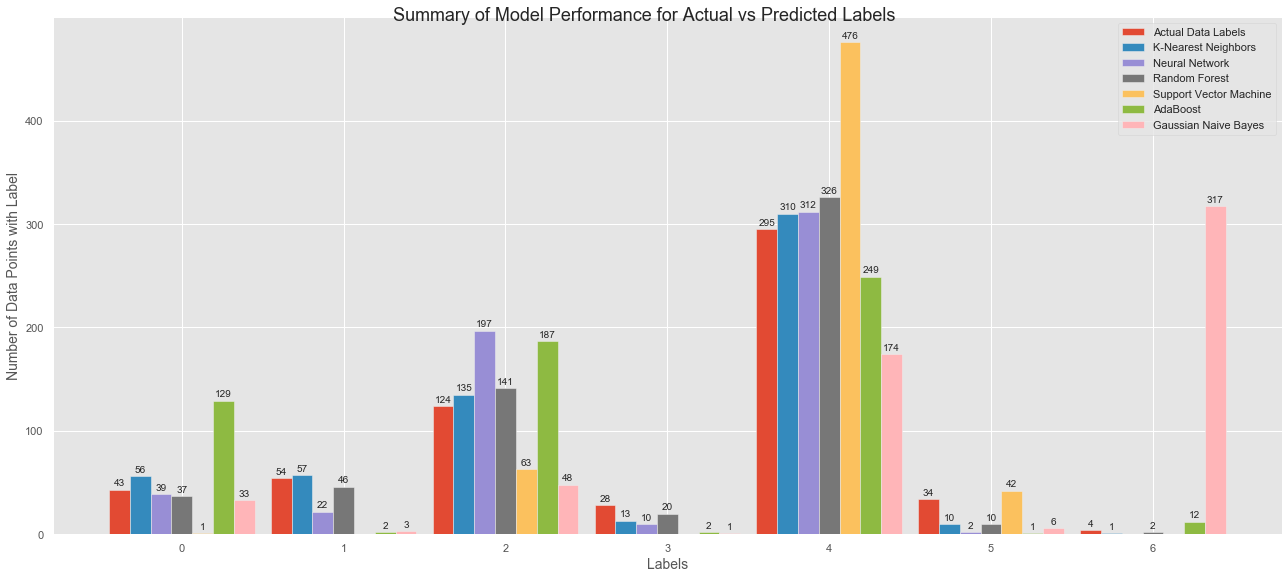

In [75]:
print(plt.style.available)

y_test_counts = np.unique(y_test, return_counts=True)
KNN_pred_counts = np.unique(KNN_pred, return_counts=True)
SVM_pred_counts = np.unique(SVM_pred, return_counts=True)
NN_pred_counts = np.unique(NN_pred, return_counts=True)
GNB_pred_counts = np.unique(GNB_pred, return_counts=True)
ADA_pred_counts = np.unique(ADA_pred, return_counts=True)
RF_pred_counts = np.unique(RF_pred, return_counts=True)

xticks = np.arange(len(y_test_counts[0]))  # the label locatio
margin = 0.05
width = (1.-2.*margin)/7

fig, (ax) = plt.subplots(figsize=(18, 8))
plt.style.use('ggplot')
fig.suptitle('Summary of Model Performance for Actual vs Predicted Labels', fontsize=18, y=1)

ax.set_xlabel("Labels", fontsize=14)
ax.set_ylabel("Number of Data Points with Label", fontsize=14)
ax.set_xticks(xticks)

ytest = ax.bar(y_test_counts[0]-width*3, y_test_counts[1], width)
ytest.set_label('Actual Data Labels')

KNN = ax.bar(KNN_pred_counts[0]-width*2, KNN_pred_counts[1], width)
KNN.set_label('K-Nearest Neighbors')

NN = ax.bar(NN_pred_counts[0]-width, NN_pred_counts[1], width)
NN.set_label('Neural Network')

RF = ax.bar(RF_pred_counts[0], RF_pred_counts[1], width)
RF.set_label('Random Forest')

SVM = ax.bar(SVM_pred_counts[0]+width, SVM_pred_counts[1], width)
SVM.set_label('Support Vector Machine')

ADA = ax.bar(ADA_pred_counts[0]+width*2, ADA_pred_counts[1], width)
ADA.set_label('AdaBoost')

GNB = ax.bar(GNB_pred_counts[0]+width*3, GNB_pred_counts[1], width)
GNB.set_label('Gaussian Naive Bayes')

autolabel(ytest,2)
autolabel(KNN,2)
autolabel(SVM,2)
autolabel(NN,2)
autolabel(GNB,2)
autolabel(ADA,2)
autolabel(RF,2)

ax.legend()
fig.tight_layout()
plt.show()

# Apply to Webscrape

In [76]:
webscrape_model = webscrape_model.rename(columns={"Age": "age"})

In [77]:
l = ['country_armenian', 'country_australian',
       'country_belizean', 'country_british',
       'country_cambodian', 'country_canadian',
       'country_colombian', 'country_cuban', 'country_dominican',
       'country_dutch', 'country_egyptian', 'country_filipina',
       'country_filipino','country_german',
       'country_guyanese', 'country_haitian', 'country_hungarian', 'country_irish', 'country_israeli',
       'country_lebanese', 'country_malaysian', 'country_mexican',
       'country_panamanian', 'country_polish', 'country_portuguese',
        'country_samoan', 'country_scottish',
       'country_serbian', 'country_singaporean', 'country_slovenian',
       'country_taiwanese', 'country_ukrainian', 'country_venezuelan', 'country_vietnamese',
       'continent_south american']

for col in l:
    webscrape_model[col] = 0

In [86]:
webscrape_model = webscrape_model[['age', 'weight_below_115', 'massage_URL', 'massage_text',
       'organized', 'minor_indicator', 'transient', 'unconventional_sex', 'country_armenian', 'country_australian',
       'country_belizean', 'country_brazilian', 'country_british',
       'country_cambodian', 'country_canadian', 'country_chinese',
       'country_colombian', 'country_cuban', 'country_dominican',
       'country_dutch', 'country_egyptian', 'country_filipina',
       'country_filipino', 'country_german',
       'country_guyanese', 'country_haitian', 'country_hungarian',
       'country_indian', 'country_irish', 'country_israeli', 'country_italian',
       'country_jamaican', 'country_japanese', 'country_korean',
       'country_lebanese', 'country_malaysian', 'country_mexican',
       'country_panamanian', 'country_polish', 'country_portuguese',
       'country_russian', 'country_samoan', 'country_scottish',
       'country_serbian', 'country_singaporean', 'country_slovenian',
       'country_spanish', 'country_taiwanese', 'country_thai',
       'country_ukrainian', 'country_venezuelan', 'country_vietnamese',
       'continent_african', 'continent_asian', 'continent_european',
       'continent_south american', 'country_moroccan']]

In [87]:
#webscrape_model.columns

In [88]:
#m10k2_model.columns

In [89]:
#KNN
w_knn_pred = knn.predict(webscrape_model)
knn_ws = webscrape_model.copy()
knn_ws['label'] = w_knn_pred
webscrape[['Title','Text']][knn_ws['label'] == 5]

,Title,Text
186,Very addicting😘 100% unique 🍆🍆🍑 I'm available for full service both text 5852837558,Hey guys I'm Sophie your best companion I'm 20 and I'm available for both in calls and out calls I'm very addicting and satisfying I give blow jobs and rim jobs 😘😘
1386,Hookup with me,"Hello guys, Im available now and READY to have some naughty chemistry fun!! I am not a robot!! I offer full service and im very professional. Call me for an unforgettable experience. HOOkUP 4692059467.Snapchat, Naughtycarrie20"
2100,Hot juice for you to **** and drink up🔥🔥,"Hey My Name is Luckyb 🍬🍭😋 Age: 29💖 indulge in the perfect Package ✨🍭 that I guarantee you'll love come back running for more 💋💋✨ ✔ Real 💯✔ Sexy 💯✔ Discreet 💯💋 Available For Men who desire the best in Companionships ‼️ Serious Inquiries only 💋 Playful 🌟 5 star enjoyment 💯 Professional Safe 💯 💕 Beautiful Smooth Body A Mesmerizing face 💕 Ill leave you satisfied from the moment we meet 💋💕✈️ CATCH ME WHILE YOU CAN ✈️ ✔ ✔ ✨ 100% independent 💎 ✨ CleanClassy 🎀👑 ✨ 100% Real Pictures 📸🎞👀 ✨ Great Hygiene 😛🍭 DONT HESITATE TO CALL or Text (702) 783 9951 Services: Incall, Outcall, Car Date, 2some, 69, ****, FWB, ****, and lots more. Am submissive so you can try style with me. I can travel any where in Las Vega"
2241,Meet up,HMU if you’re down to **** or buy nudes and videos \nSnap: rcash4088\nNumber: 2133386867\nI charge though


In [90]:
#SVM
w_svm_pred = svm_model.predict(webscrape_model)
svm_ws = webscrape_model.copy()
svm_ws['label'] = w_svm_pred
webscrape[svm_ws['label'] == 5]

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient
4,"Houston, TX",I’m Available for both Incall and outcall hotlizzy❤️💝🍆🍆🍆🍆 (917) 633-5298,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1706887-I-m-Available-for-both-Incall-and-outcall-hotlizzy-917-633-5298.html,"Hey My Name is Lizzy 🍬🍭😋 Age: 33💖 indulge in the perfect Package ✨🍭 that I guarantee you'll love come back running for more 💋💋✨ ✔ Real 💯✔ Sexy 💯✔ Discreet 💯💋 Available For Men who desire the best in Companionships ‼️ Serious Inquiries only 💋 Playful 🌟 5 star enjoyment 💯 Professional Safe 💯 💕 Beautiful Smooth Body A Mesmerizing face 💕 Ill leave you satisfied from the moment we meet 💋💕✈️ CATCH ME WHILE YOU CAN ✈️ ✔ ✔ ✨ 100% independent 💎 ✨ CleanClassy 🎀👑 ✨ 100% Real Pictures 📸🎞👀 ✨ Great Hygiene 😛🍭 DONT HESITATE TO CALL or Text (917) 633-5298 Services: Incall, Outcall, Car Date, 2some, 69, ****, FWB, ****, and lots more. Am submissive so you can try style with me. I can travel any where in Houston",Owen Lizzy,Female,33,Straight,"Incall, Outcall, Car Date, 2some, 69, BJ, FWB, Anal.",Men,...,0,NaN,NaN,NaN,0,0,7,5,0,1
10,"Houston, TX",I’m Available for both Incall and outcall hotjoselyn 💝🍆🍆 (970) 335-9963,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1704718-I-m-Available-for-both-Incall-and-outcall-hotjoselyn-970-335-9963.html,"Hey My Name is Joselyn 🍬🍭😋 Age: 29💖 indulge in the perfect Package ✨🍭 that I guarantee you'll love come back running for more 💋💋✨ ✔ Real 💯✔ Sexy 💯✔ Discreet 💯💋 Available For Men who desire the best in Companionships ‼️ Serious Inquiries only 💋 Playful 🌟 5 star enjoyment 💯 Professional Safe 💯 💕 Beautiful Smooth Body A Mesmerizing face 💕 Ill leave you satisfied from the moment we meet 💋💕✈️ CATCH ME WHILE YOU CAN ✈️ ✔ ✔ ✨ 100% independent 💎 ✨ CleanClassy 🎀👑 ✨ 100% Real Pictures 📸🎞👀 ✨ Great Hygiene 😛🍭 DONT HESITATE TO CALL or Text (970) 335-9963 Services: Incall, Outcall, Car Date, 2some, 69, ****, FWB, ****, and lots more. Am submissive so you can try style with me. I can travel any where in Houston",Joselyn,Female,30,Straight,"Incall, Outcall, Car Date, 2some, 69, BJ, FWB, Anal",Men/Women/Couples,...,0,NaN,NaN,NaN,0,0,7,5,0,1
28,"Houston, TX","210-817-5336 Sweet and hot, ready for you to give you maximum satisfaction",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1695180-210-817-5336-Sweet-and-hot-ready-for-you-to-give-you-maximum-satisfaction.html,"My Top service(* with out condom or With Condom What you like) Handjob⭐ Best ****⫸Hand Release⫸⭐Specialy **** your own style. 🍎 Magic Touch & Gentle relaxation 🍎 I’m Independent, Open Minded, Setish Friendly, Respectful,And Very Discreet. 🍎 I Am Very Sensual And Have a Great Personality 🍎 B2B Massage/ GFE / **** no cover / NURU/69 Free Shower 🍎 SPEICAL DOGGY,****,ORAL,Squirters & 69 STYLE ****. 💘Day or night I’m always available to take care of all your needs. Am Kathy 32yrs 🌟 I have sexy **** & ass,juicy wet ****.🌟 You can play with my **** & Ass.🌟 I love Dirty Oral💋 Extreme Doggy 💕69 💕**** 💕**** 💕💕🎲 Don’t waste your time or mines ! Very playful ❣ very sexy NB TEXT ONLY 210-817-533",Kate,Female,32,Straight,"210-817-5336 HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69,Doggy Style, Up Missionary,shard, spoon in,speed bump",Men/Women/Couples,...,0,NaN,NaN,NaN,0,1,2,1,1,0
36,"Houston, TX",Beautiful Ts Goddess! Ts NaTasha Cunnings!,https://www.yesbackpage.com/299/posts/8-Adult/126-TS/1454245-Beautiful-Ts-Goddess-Ts-NaTasha-Cunnings-.html,"Hi im Ts NaTasha Cunnings. I stand 5'7, 175 lbs & my measurements are 38ddd-24-38 & I have 9 1/2 inches. Im versatile & open minded. I love first timers & fetishes. Overnight stays & multiple hours upon request. Couples welcomed. Incalls & outcalls 832-966-6091. Available 24/7",NaTasha Cunnings,TS,30,Switch,All Services!,Men,...,0,NaN,NaN,NaN,0,0,2,0,2,0
37,"Houston, TX

In [91]:
#NN
nn_pred = NNmodel.predict(webscrape_model)
nn_ws = webscrape_model.copy()
nn_ws['label'] = nn_pred
webscrape[nn_ws['label'] == 5]

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient


In [92]:
#GB
gb_pred = gb_model.predict(webscrape_model)
gb_ws = webscrape_model.copy()
gb_ws['label'] = gb_pred
webscrape[gb_ws['label'] == 6].head(3)


,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient
0,"Houston, TX",꧂ I Am Available For OutCall and InCall ꧂ 💥💥 WET **** 🍑🍭SEXY 📲 +1(631)378-9267,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707851--I-Am-Available-For-OutCall-and-InCall-WET-SEXY-1-631-378-9267.html,💕Hey y’all💕 😋 I’m Kimberly And I’m Here To Please You And Make Your Night Like No Other. I’m 100% Real And I’m All About Good Business. My Goal Is To Make You Happy And Satisfied. 😻NO LAWENFORCEMENT 😍💎 I’m Always Available 24/7 📲 +1(631)378-9267 Safe And Discreet💎 Incalls Available. 💎Outcall Available Upon Request✨No Drama⭕️No Blocked Calls ⭕️No Games. Come See What You are Missing Out On 🍑 🍆🍑👉👌💋Do not hesitate to CALL: ☎️ +1(631)378-9267 or TEXT: 📲 +1(631)378-926,Kimberly 😻,Female,27,Straight,Female Excort: Available for both In-calls and Out-calls,Men/Women/Couples,...,0,NaN,NaN,NaN,0,0,3,1,0,0
1,"Houston, TX","Sweet and hot and juicy , ready for ***💋💋💋 (405) 456 9045",https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707591-Sweet-and-hot-and-juicy-ready-for-405-456-9045.html,"Hi I’m Isabella Rolland really sweet and polite 👅I wanna do things just the way you will love it💋can you **** with me tonight ,I want to fulfill your widest fantasies 👅😍will give you my full service such as hardcore,**** ,HJ , **** **** ,breast **** and many more👅😍Super open minded looking to have fun with grown respectful gentlemen only,I’m 💯 real ,😍😍I'm always availabl",Isabella Rolland,Female,28,Straight,"HARDCORE,BREST FUCK,ANAL,BLOW JOB,GFE,69.",Men,...,0,NaN,NaN,NaN,0,0,2,2,1,0
3,"Houston, TX",Hook up,https://www.yesbackpage.com/299/posts/8-Adult/122-Female-Escorts/1707307-Hook-up.html,"Heyyoo❤️,I’m linda, 29 yrs... I’m looking for a big huge **** I’m gonna ride so good 🙊😋😋🍆🍆..My **** is dripping wet and Ready To stick your di€k🍆 in baby. Come stick my butt 🍑I do Bdsm, Bbbj, ****, Hfs, **** and bareback. I’m always ready for hookup. ***Incalls / outcalls / Car Calls / Hotel / Motel are all services provided *** I am willing to drive up to 50 miles to outcall locations .🚗 👉If you’r serious, Not looking for chat games please ‘Contact with me:-➜ (918) 300-0281 , Snapchat ID : andrey_lind",Linda andrey,Female,29,Straight,Hook up,Men/Women/Couples,...,0,NaN,NaN,NaN,0,0,2,0,0,0


In [93]:
#RF
rf_pred = rf.predict(webscrape_model)
rf_ws = webscrape_model.copy()
rf_ws['label'] = rf_pred
webscrape[rf_ws['label'] == 6].head()

,City,Title,URL,Text,Name,Sex,Age,Sexual Orientation,Services,Services Provided For,...,weight_below_115,country,continent,website,massage_URL,massage_text,organized,minor_indicator,unconventional_sex,transient
2181,"Las Vegas, NV",Hardcore💦🍆🍑 👅 69...💦🍆,https://www.yesbackpage.com/191/posts/8-Adult/122-Female-Escorts/1681551-Hardcore-69-.html,"MY WET 💦💦 **** IS READY TO TAKE IN SOME GOOD HARD COCK THAT WANT SOME JUICES I OFFER ""INCALL AND OUTCALL AND CARDATE"" ALL STYLE ARE WELCOME AND I HAVE NO LIMIT ALWAYS ASK FOR MY DONATION I'M READY TO DO WHAT I YOUR GF OR WIFE CANT DO I NEED GENTLEMEN TO TEXT ME WHEN YOU ARE READY FOR FULL FUN 🍆🍑💦...... I am always in a cheerful mood and always creamy 😊😊😊😊 ❤❤❤❤Dont hesitate to text me if you are in need of some pleasurable moment.😊😊😊😊 I WORK ALONE, NO PIMP, NO MISTRESS, NO ROOM MATE. YOU ARE IN SAFE HANDS. REAL, BIG NATURAL TITTIES,ALL ROUND PLEASURE, 420 friendly and I also like to party😉😉😉 TEXT ME Strong text (267) 452-034",Anna,Female,21,Straight,Hardcore💦🍆🍑 👅 69...💦🍆,Men,...,0,NaN,NaN,NaN,0,0,4,0,0,0
2613,"Atlanta, GA",Hardcore💦🍆🍑 👅 69...💦🍆,https://www.yesbackpage.com/87/posts/8-Adult/122-Female-Escorts/1670669-Hardcore-69-.html,"MY WET 💦💦 **** IS READY TO TAKE IN SOME GOOD HARD COCK THAT WANT SOME JUICES I OFFER ""INCALL AND OUTCALL AND CARDATE"" ALL STYLE ARE WELCOME AND I HAVE NO LIMIT ALWAYS ASK FOR MY DONATION I'M READY TO DO WHAT I YOUR GF OR WIFE CANT DO I NEED GENTLEMEN TO TEXT ME WHEN YOU ARE READY FOR FULL FUN 🍆🍑💦...... I am always in a cheerful mood and always creamy 😊😊😊😊 ❤❤❤❤Dont hesitate to text me if you are in need of some pleasurable moment.😊😊😊😊 I WORK ALONE, NO PIMP, NO MISTRESS, NO ROOM MATE. YOU ARE IN SAFE HANDS. REAL, BIG NATURAL TITTIES,ALL ROUND PLEASURE, 420 friendly and I also like to party😉😉😉 TEXT ME Strong text (302) 319-368",Emily,Female,21,Straight,Hardcore💦🍆🍑 👅 69...💦🍆,Men,...,0,NaN,NaN,NaN,0,0,4,0,0,0
2614,"Atlanta, GA",Hardcore💦🍆🍑 👅 69...💦🍆,https://www.yesbackpage.com/87/posts/8-Adult/122-Female-Escorts/1670654-Hardcore-69-.html,"MY WET 💦💦 **** IS READY TO TAKE IN SOME GOOD HARD COCK THAT WANT SOME JUICES I OFFER ""INCALL AND OUTCALL AND CARDATE"" ALL STYLE ARE WELCOME AND I HAVE NO LIMIT ALWAYS ASK FOR MY DONATION I'M READY TO DO WHAT I YOUR GF OR WIFE CANT DO I NEED GENTLEMEN TO TEXT ME WHEN YOU ARE READY FOR FULL FUN 🍆🍑💦...... I am always in a cheerful mood and always creamy 😊😊😊😊 ❤❤❤❤Dont hesitate to text me if you are in need of some pleasurable moment.😊😊😊😊 I WORK ALONE, NO PIMP, NO MISTRESS, NO ROOM MATE. YOU ARE IN SAFE HANDS. REAL, BIG NATURAL TITTIES,ALL ROUND PLEASURE, 420 friendly and I also like to party😉😉😉 TEXT ME Strong text (480) 666-291",Bree,Female,21,Straight,Hardcore💦🍆🍑 👅 69...💦🍆,Men,...,0,NaN,NaN,NaN,0,0,4,0,0,0
